---

## 1.Problem Definition

Predict the Global_Sale
1. Analyse the importance of features that can be of help in increasing the global sales

---

## 2.Dataset Preview

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
videoGames=pd.read_csv("Video_Games.csv")
videoGames.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
videoGames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


---

## 3.Data Cleaning / Preparation

In [4]:
videoGamesSelected=pd.DataFrame(videoGames[['Platform','Genre','Publisher','Critic_Score','Global_Sales','User_Score','Rating', 'JP_Sales']])
videoGamesSelected = videoGamesSelected[videoGamesSelected.User_Score != "tbd"]
videoGamesSelected["User_Score"] = pd.to_numeric(videoGamesSelected["User_Score"])
videoGamesSelected

,Platform,Genre,Publisher,Critic_Score,Global_Sales,User_Score,Rating,JP_Sales
0,Wii,Sports,Nintendo,76.0,82.53,8.0,E,3.77
1,NES,Platform,Nintendo,NaN,40.24,NaN,NaN,6.81
2,Wii,Racing,Nintendo,82.0,35.52,8.3,E,3.79
3,Wii,Sports,Nintendo,80.0,32.77,8.0,E,3.28
4,GB,Role-Playing,Nintendo,NaN,31.37,NaN,NaN,10.22
...,...,...,...,...,...,...,...,...
16714,PS3,Action,Tecmo Koei,NaN,0.01,NaN,NaN,0.01
16715,X360,Sports,Codemasters,NaN,0.01,NaN,NaN,0.00
16716,PSV,Adventure,Idea Factory,NaN,0.01,NaN,NaN,0.01
16717,GBA,Platform,Wanadoo,NaN,0.01,NaN,NaN,0.00


In [5]:
for i in videoGamesSelected:
    print(i, videoGamesSelected[i].isnull().sum())

Platform 0
Genre 2
Publisher 52
Critic_Score 7239
Global_Sales 0
User_Score 6704
Rating 6719
JP_Sales 0


In [6]:
videoGamesSelectedCleaned=pd.DataFrame(videoGamesSelected[~videoGamesSelected
                                                          ['Critic_Score'].isnull() &
                                                         ~videoGamesSelected
                                                          ['Publisher'].isnull() &
                                                         ~videoGamesSelected
                                                          ['Genre'].isnull() &
                                                          ~videoGamesSelected
                                                          ['User_Score'].isnull() &
                                                          ~videoGamesSelected
                                                          ['Rating'].isnull() &
                                                          ~videoGamesSelected
                                                          ['JP_Sales'].isnull()])
videoGamesSelectedCleaned

,Platform,Genre,Publisher,Critic_Score,Global_Sales,User_Score,Rating,JP_Sales
0,Wii,Sports,Nintendo,76.0,82.53,8.0,E,3.77
2,Wii,Racing,Nintendo,82.0,35.52,8.3,E,3.79
3,Wii,Sports,Nintendo,80.0,32.77,8.0,E,3.28
6,DS,Platform,Nintendo,89.0,29.80,8.5,E,6.50
7,Wii,Misc,Nintendo,58.0,28.92,6.6,E,2.93
...,...,...,...,...,...,...,...,...
16667,GBA,Action,NewKidCo,46.0,0.01,2.4,E,0.00
16677,GBA,Fighting,Midway Games,81.0,0.01,8.8,M,0.00
16696,PC,Action,Konami Digital Entertainment,80.0,0.01,7.6,M,0.00
16700,PC,Shooter,Destineer,61.0,0.01,5.8,T,0.00


In [7]:
for i in videoGamesSelectedCleaned:
    print(i, videoGamesSelectedCleaned[i].isnull().sum())

Platform 0
Genre 0
Publisher 0
Critic_Score 0
Global_Sales 0
User_Score 0
Rating 0
JP_Sales 0


---

## 4.Data Analysis / Visualisation

### Visualisation for Rating

In [8]:
videoGamesSelectedCleaned['Rating'].unique()

array(['E', 'M', 'T', 'E10+', 'AO', 'K-A', 'RP'], dtype=object)

### Visualisation for Genre

In [9]:
videoGamesSelectedCleaned['Genre'].unique()

array(['Sports', 'Racing', 'Platform', 'Misc', 'Action', 'Puzzle',
       'Shooter', 'Fighting', 'Simulation', 'Role-Playing', 'Adventure',
       'Strategy'], dtype=object)

### Visualisation for Platform

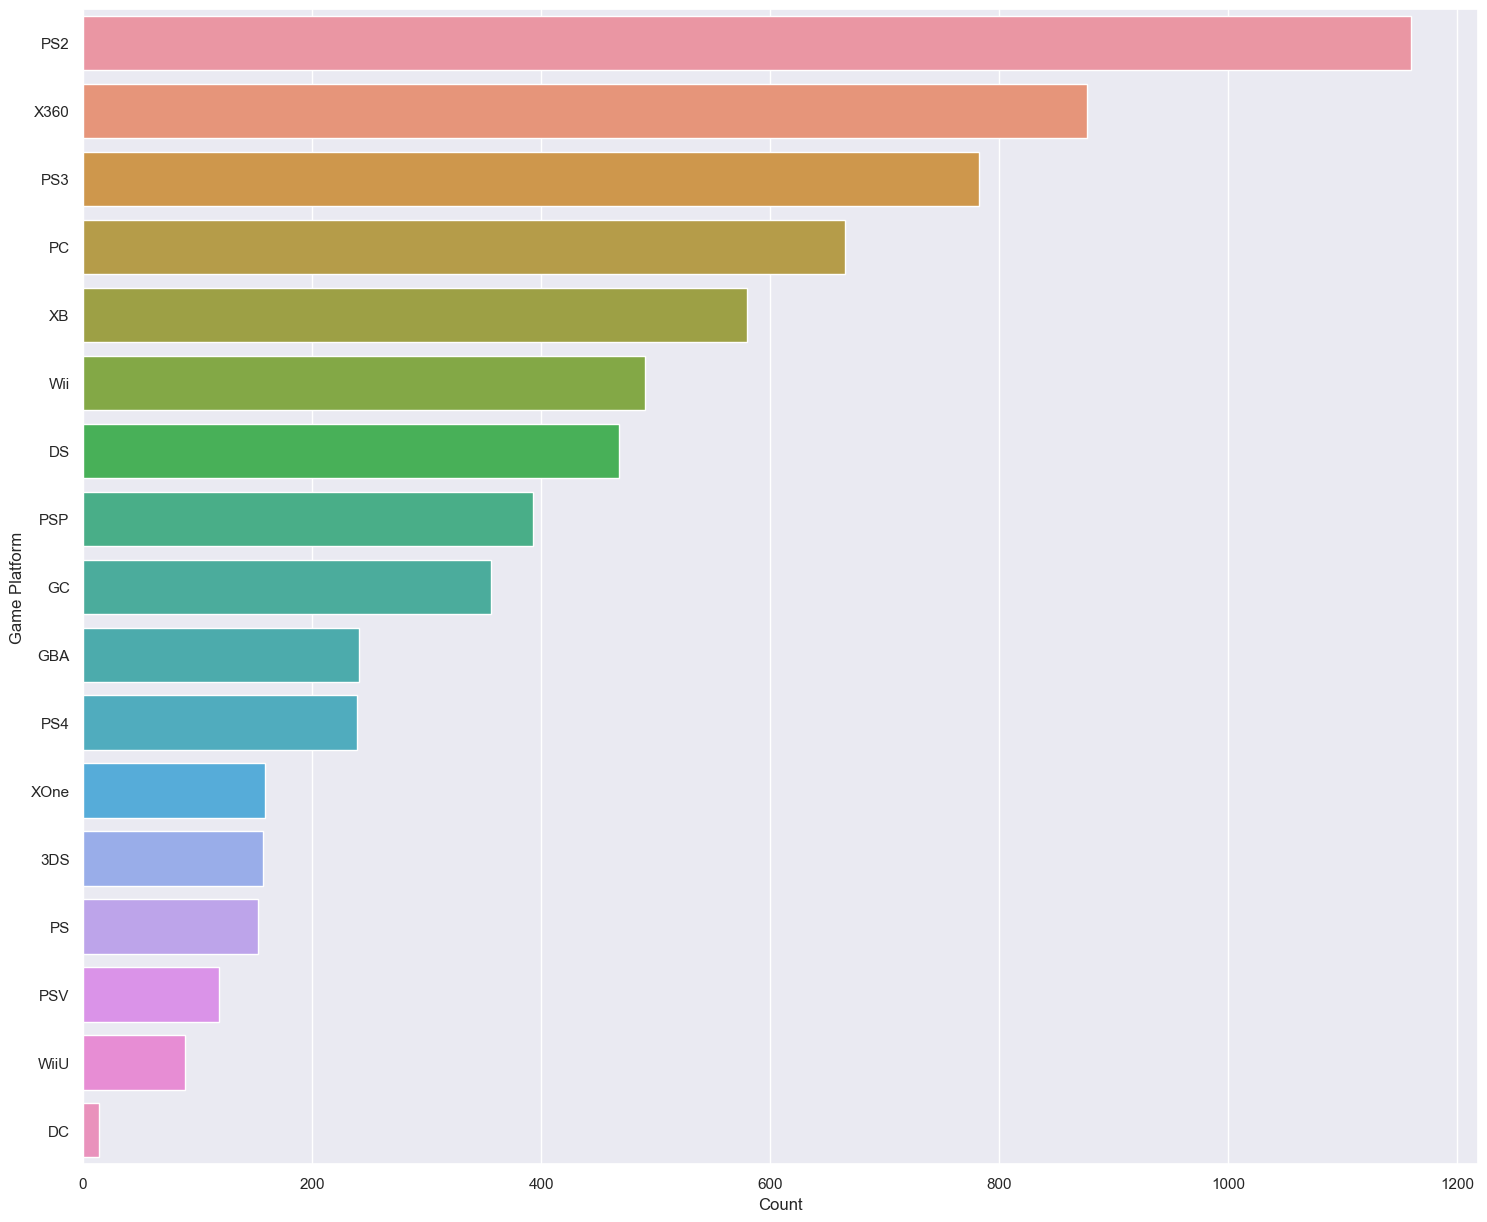

In [10]:
platform_count = pd.DataFrame()
platform_count = videoGamesSelectedCleaned.loc[:,'Platform'].value_counts()
platform_count = platform_count.to_frame()
platform_count['Game Platform'] = platform_count.index
platform_count = platform_count.rename(columns = {'Platform' : 'Count'})

plt.figure(figsize=(18, 15))
sb.set(font_scale = 1)
sb.barplot(data = platform_count, x = 'Count', y = 'Game Platform')
plt.show()

### visualisation for Publisher

In [11]:
videoGamesSelectedCleaned['Publisher'].nunique()
videoGamesSelectedCleaned['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'SquareSoft',
       'GT Interactive', 'Konami Digital Entertainment', 'Square Enix',
       'Sony Computer Entertainment Europe', 'Virgin Interactive',
       'LucasArts', '505 Games', 'Capcom',
       'Warner Bros. Interactive Entertainment', 'Universal Interactive',
       'RedOctane', 'Atari', 'Eidos Interactive', 'Namco Bandai Games',
       'Vivendi Games', 'MTV Games', 'Sega', 'THQ',
       'Disney Interactive Studios', 'Acclaim Entertainment',
       'Midway Games', 'Deep Silver', 'NCSoft', 'Tecmo Koei',
       'Valve Software', 'Infogrames', 'Mindscape', 'Valve',
       'Hello Games', 'Global Star', 'Gotham Games',
       'Crave Entertainment', 'Hasbro Interactive', 'Codemasters',
       'TDK Mediactive', 'Zoo Games', 'Sony Online Entertainment', 'RTL',
       'D3Publisher', 'Unknown', 'Black Label G

In [12]:
videoGamesPublisher=videoGamesSelectedCleaned.groupby('Publisher')
videoGamesPublisher=videoGamesPublisher.filter(lambda x:len(x)>=50)
videoGamesPublisher

,Platform,Genre,Publisher,Critic_Score,Global_Sales,User_Score,Rating,JP_Sales
0,Wii,Sports,Nintendo,76.0,82.53,8.0,E,3.77
2,Wii,Racing,Nintendo,82.0,35.52,8.3,E,3.79
3,Wii,Sports,Nintendo,80.0,32.77,8.0,E,3.28
6,DS,Platform,Nintendo,89.0,29.80,8.5,E,6.50
7,Wii,Misc,Nintendo,58.0,28.92,6.6,E,2.93
...,...,...,...,...,...,...,...,...
16644,PC,Strategy,Codemasters,51.0,0.01,3.8,E10+,0.00
16656,WiiU,Action,Nintendo,81.0,0.01,8.5,E,0.00
16677,GBA,Fighting,Midway Games,81.0,0.01,8.8,M,0.00
16696,PC,Action,Konami Digital Entertainment,80.0,0.01,7.6,M,0.00


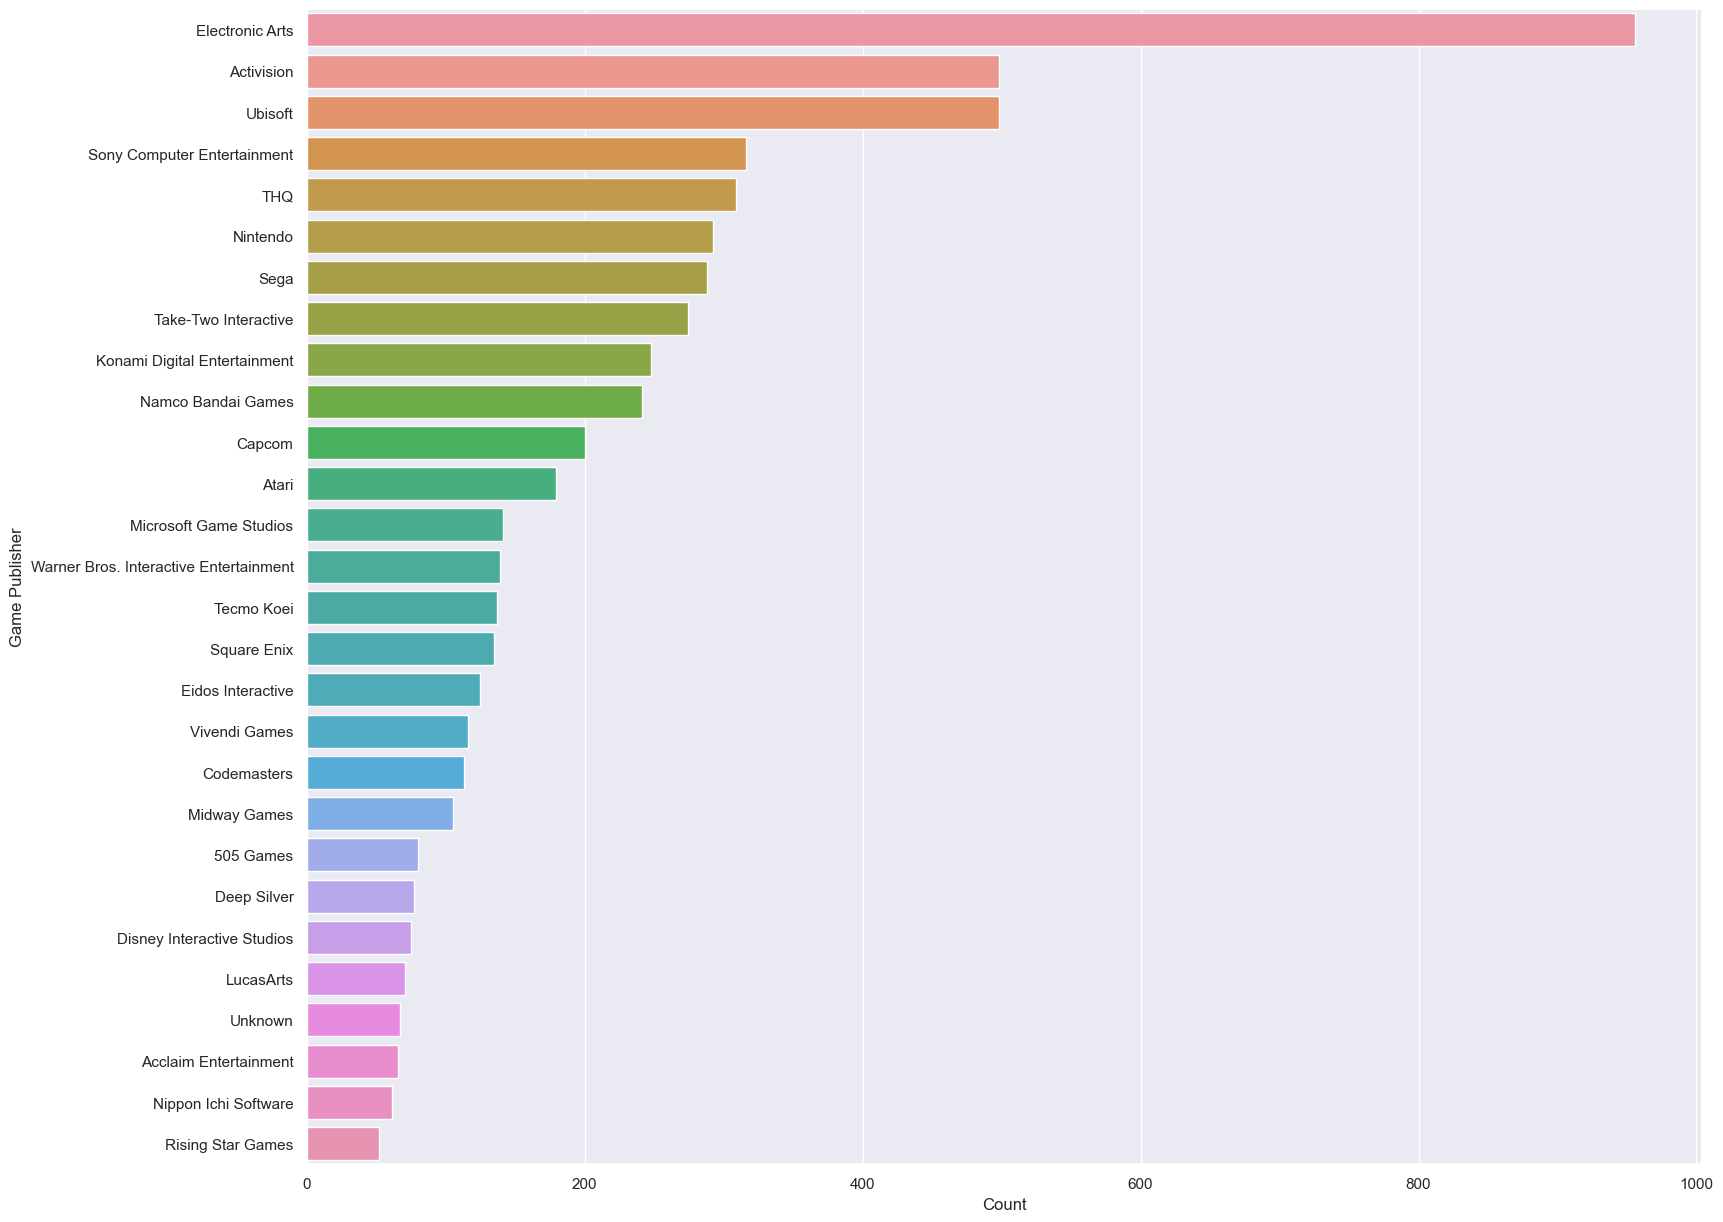

In [13]:
publisher_count = pd.DataFrame()
publisher_count = videoGamesPublisher.loc[:,'Publisher'].value_counts()
publisher_count = publisher_count.to_frame()
publisher_count['Game Publisher'] = publisher_count.index
publisher_count = publisher_count.rename(columns = {'Publisher' : 'Count'})

plt.figure(figsize=(18, 15))
sb.set(font_scale = 1)
sb.barplot(data = publisher_count, x = 'Count', y = 'Game Publisher')
plt.show()

<AxesSubplot:xlabel='Global_Sales', ylabel='Publisher'>

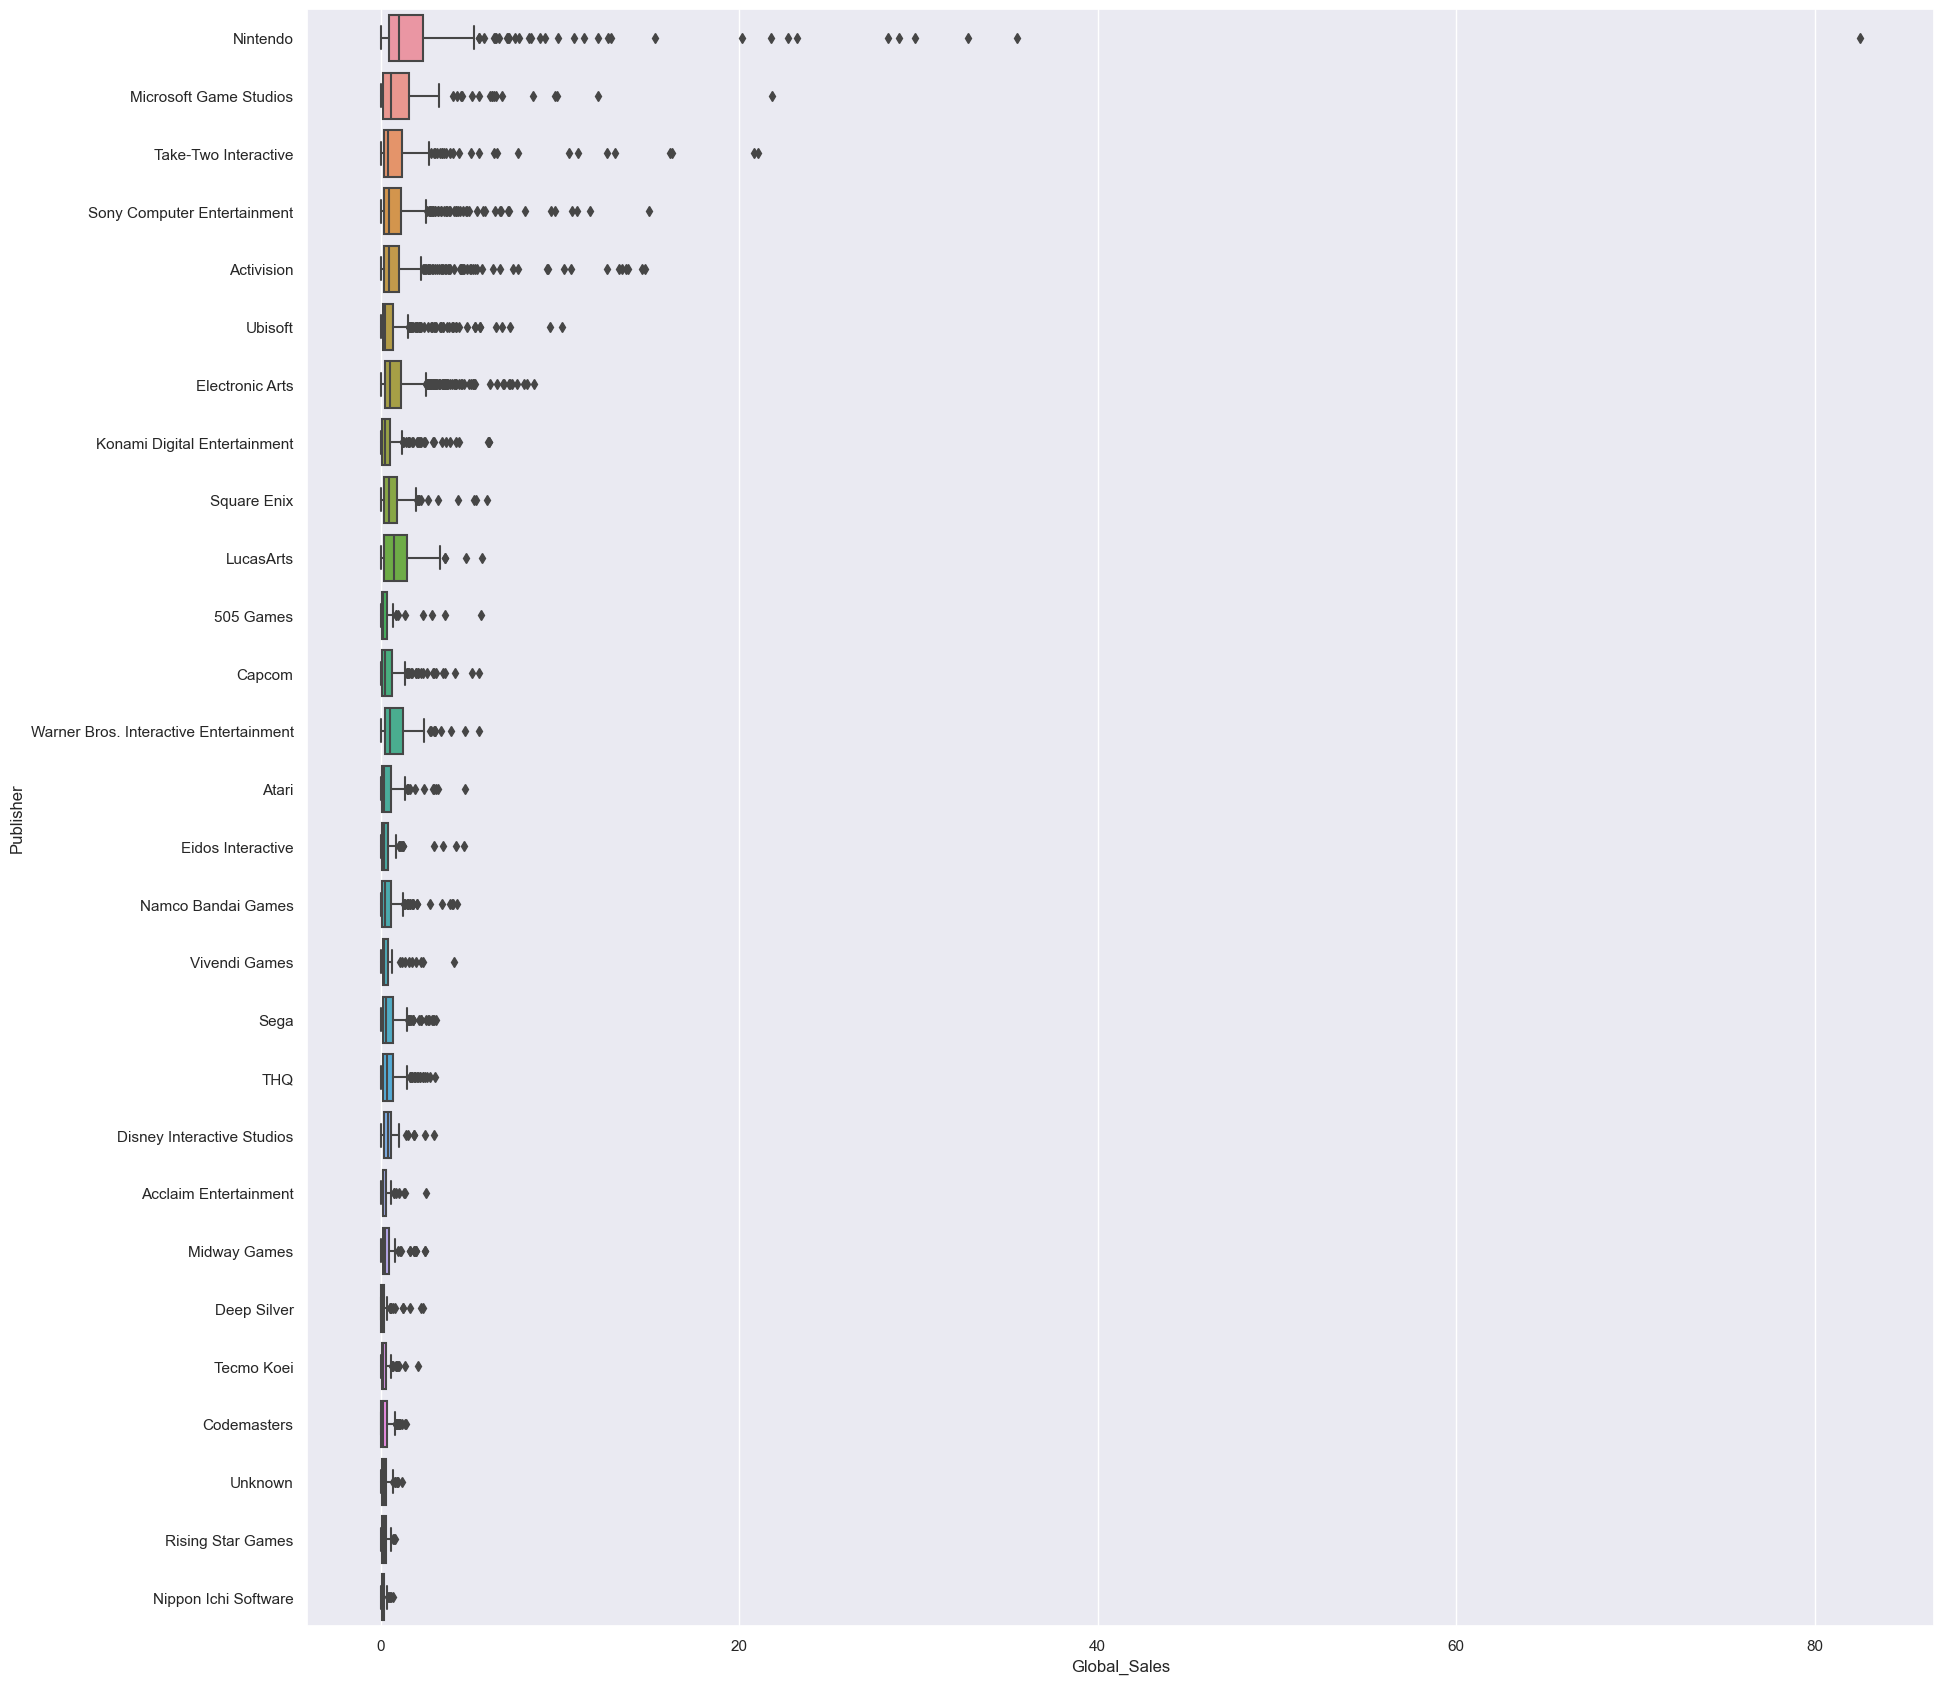

In [14]:
f=plt.figure(figsize=(21,21))
sb.boxplot(x='Global_Sales', y = 'Publisher', orient='h', data = videoGamesPublisher)

In [15]:
def right(s):
    Q1=s.quantile(0.25)
    Q3=s.quantile(0.75)
    IQR=Q3-Q1
    return Q3+IQR
    
def left(s):
    Q1=s.quantile(0.25)
    Q3=s.quantile(0.75)
    IQR=Q3-Q1
    return Q1-IQR

### For companies with over 50 sales

In [16]:
def removeOutliers(df,predictor,response):
    videoGamesPublisherGrouped=df.groupby(predictor)#['Global_Sales']
    whiskers=videoGamesPublisherGrouped[response].apply(lambda x: [left(x),right(x)]).apply(pd.Series)
    whiskers.columns=['left','right']
    merge=pd.merge(df,whiskers,on=predictor)
    videoGamesPublisherGrouped=merge[(merge[response]<=(merge['right'])) &
                                     (merge[response]>=(merge['left']))]
    f=plt.figure(figsize=(21,21))
    sb.boxplot(x=response, y = predictor, orient='h', data = videoGamesPublisherGrouped, 
          order= videoGamesPublisherGrouped.groupby(predictor)[response].median().sort_values(ascending=False).index)

## not complete but I think this can only be applied to numeric data i.e. critic score
def checkSkew(df,predictor):
  groupedDf=df.groupby(predictor)
  uniquePredictors=df[predictor].unique()
  for i in uniquePredictors:
    print(i, groupedDf[i].skew())

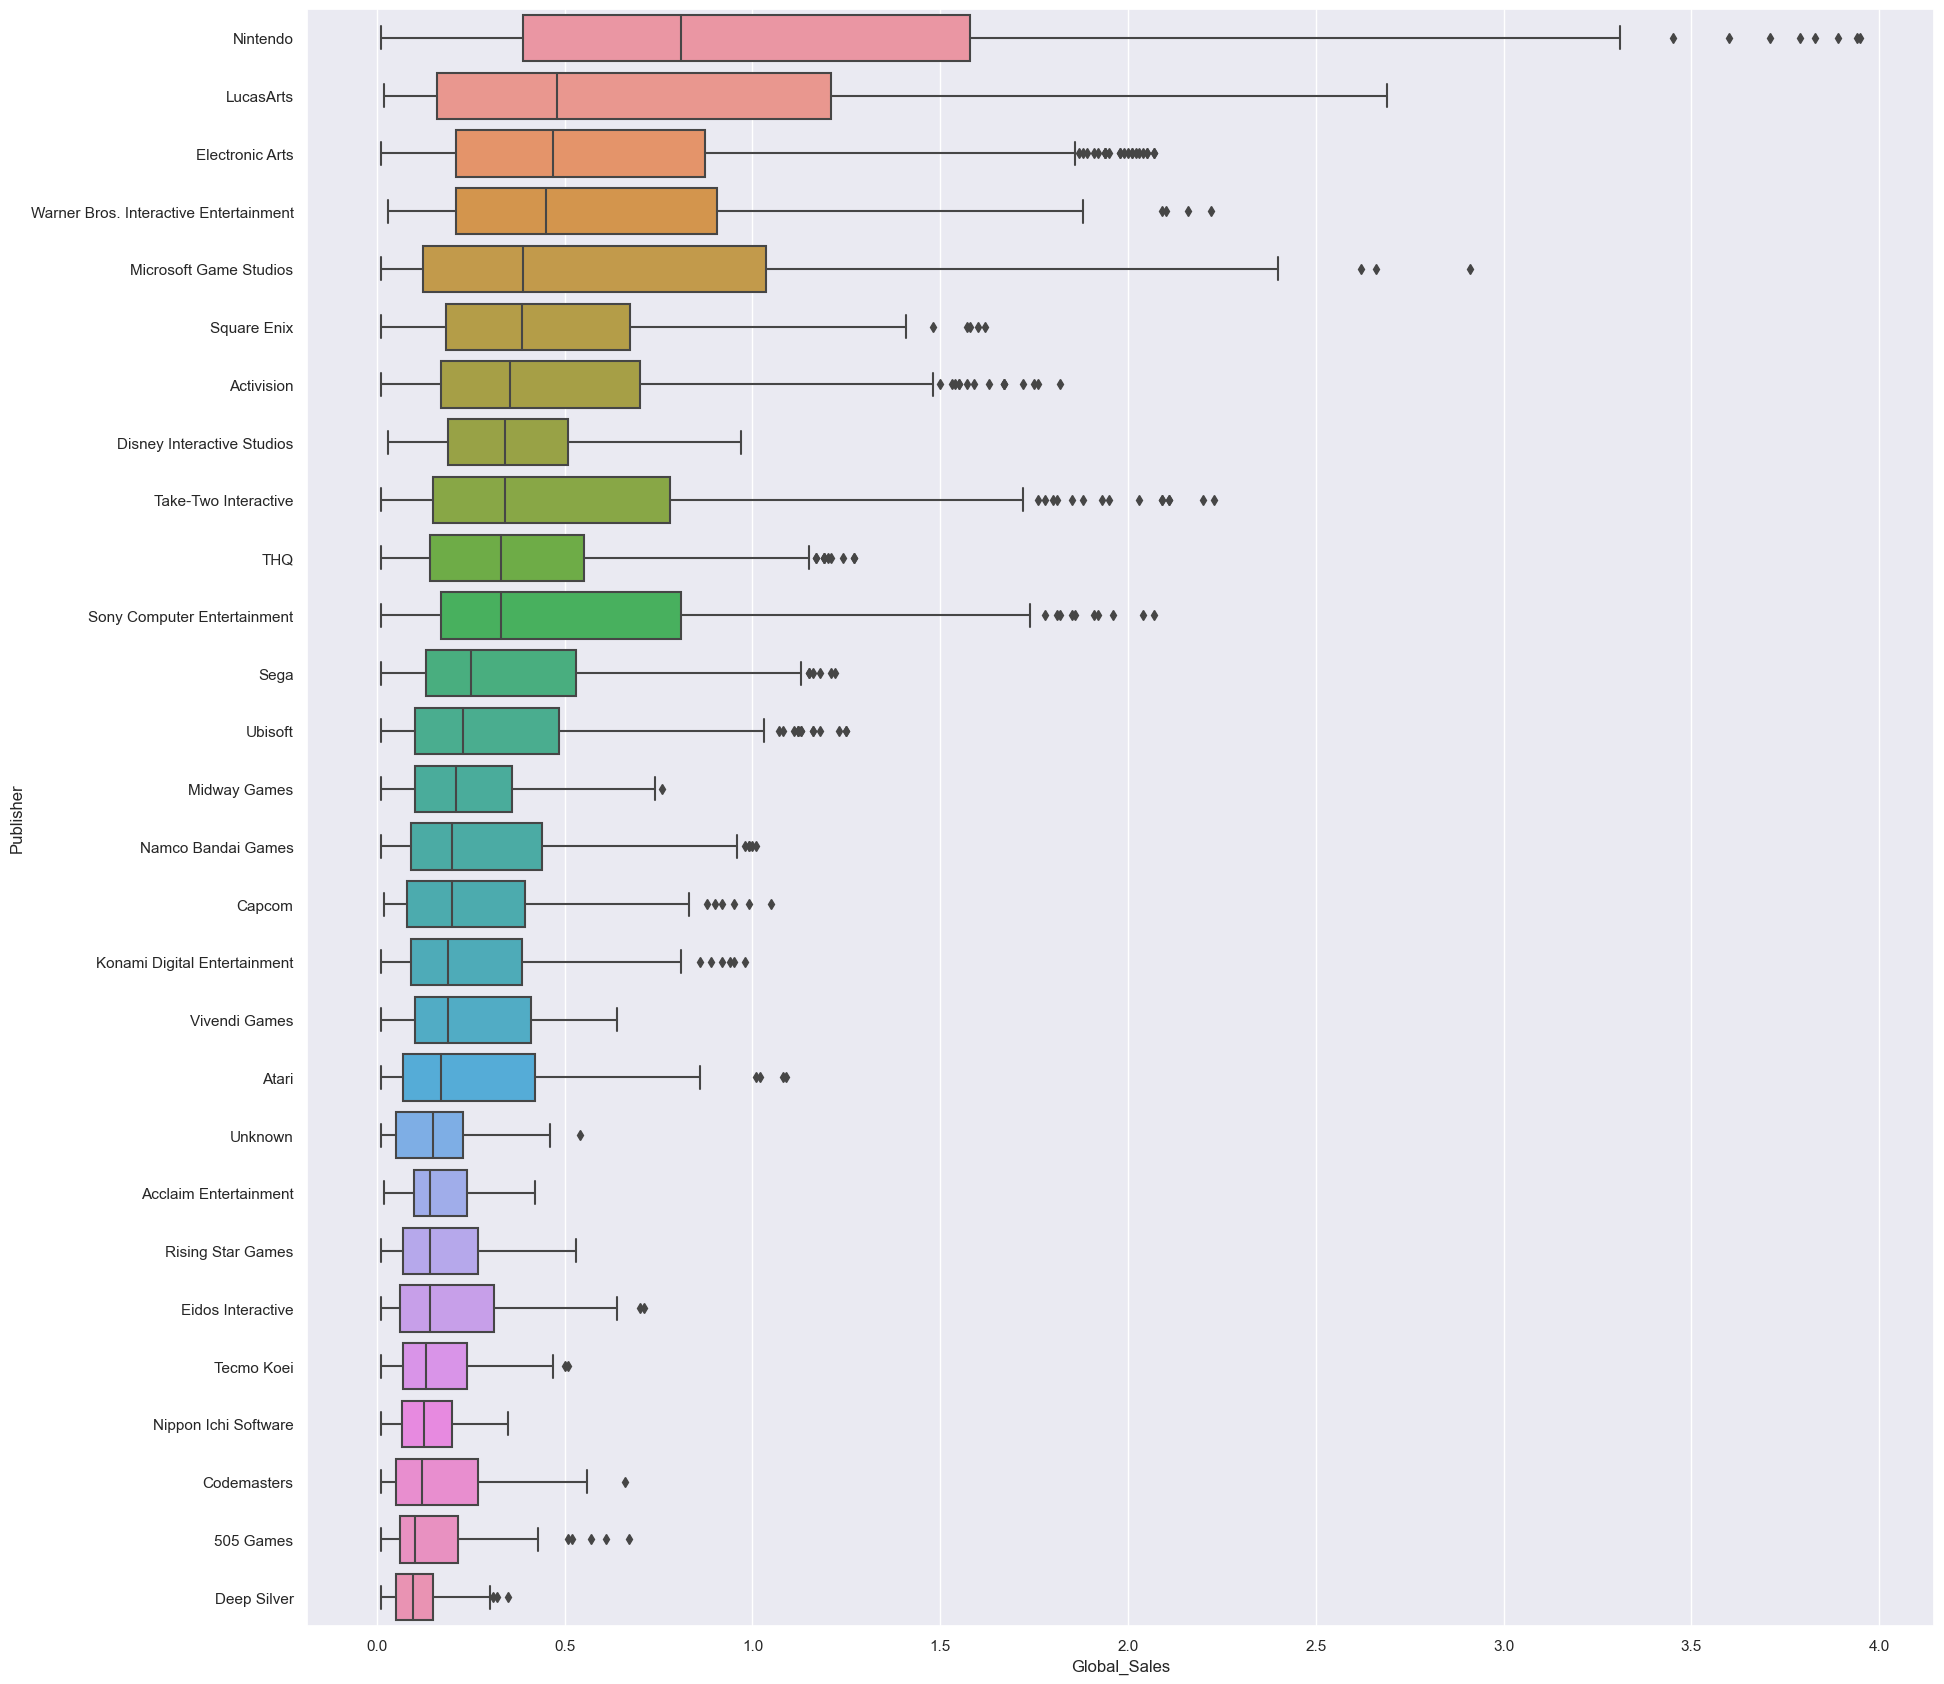

In [17]:
removeOutliers(videoGamesPublisher,'Publisher','Global_Sales')

### Visualisation for Genre

In [18]:
videoGamesSelectedCleaned['Genre'].nunique()

12

<AxesSubplot:xlabel='Global_Sales', ylabel='Genre'>

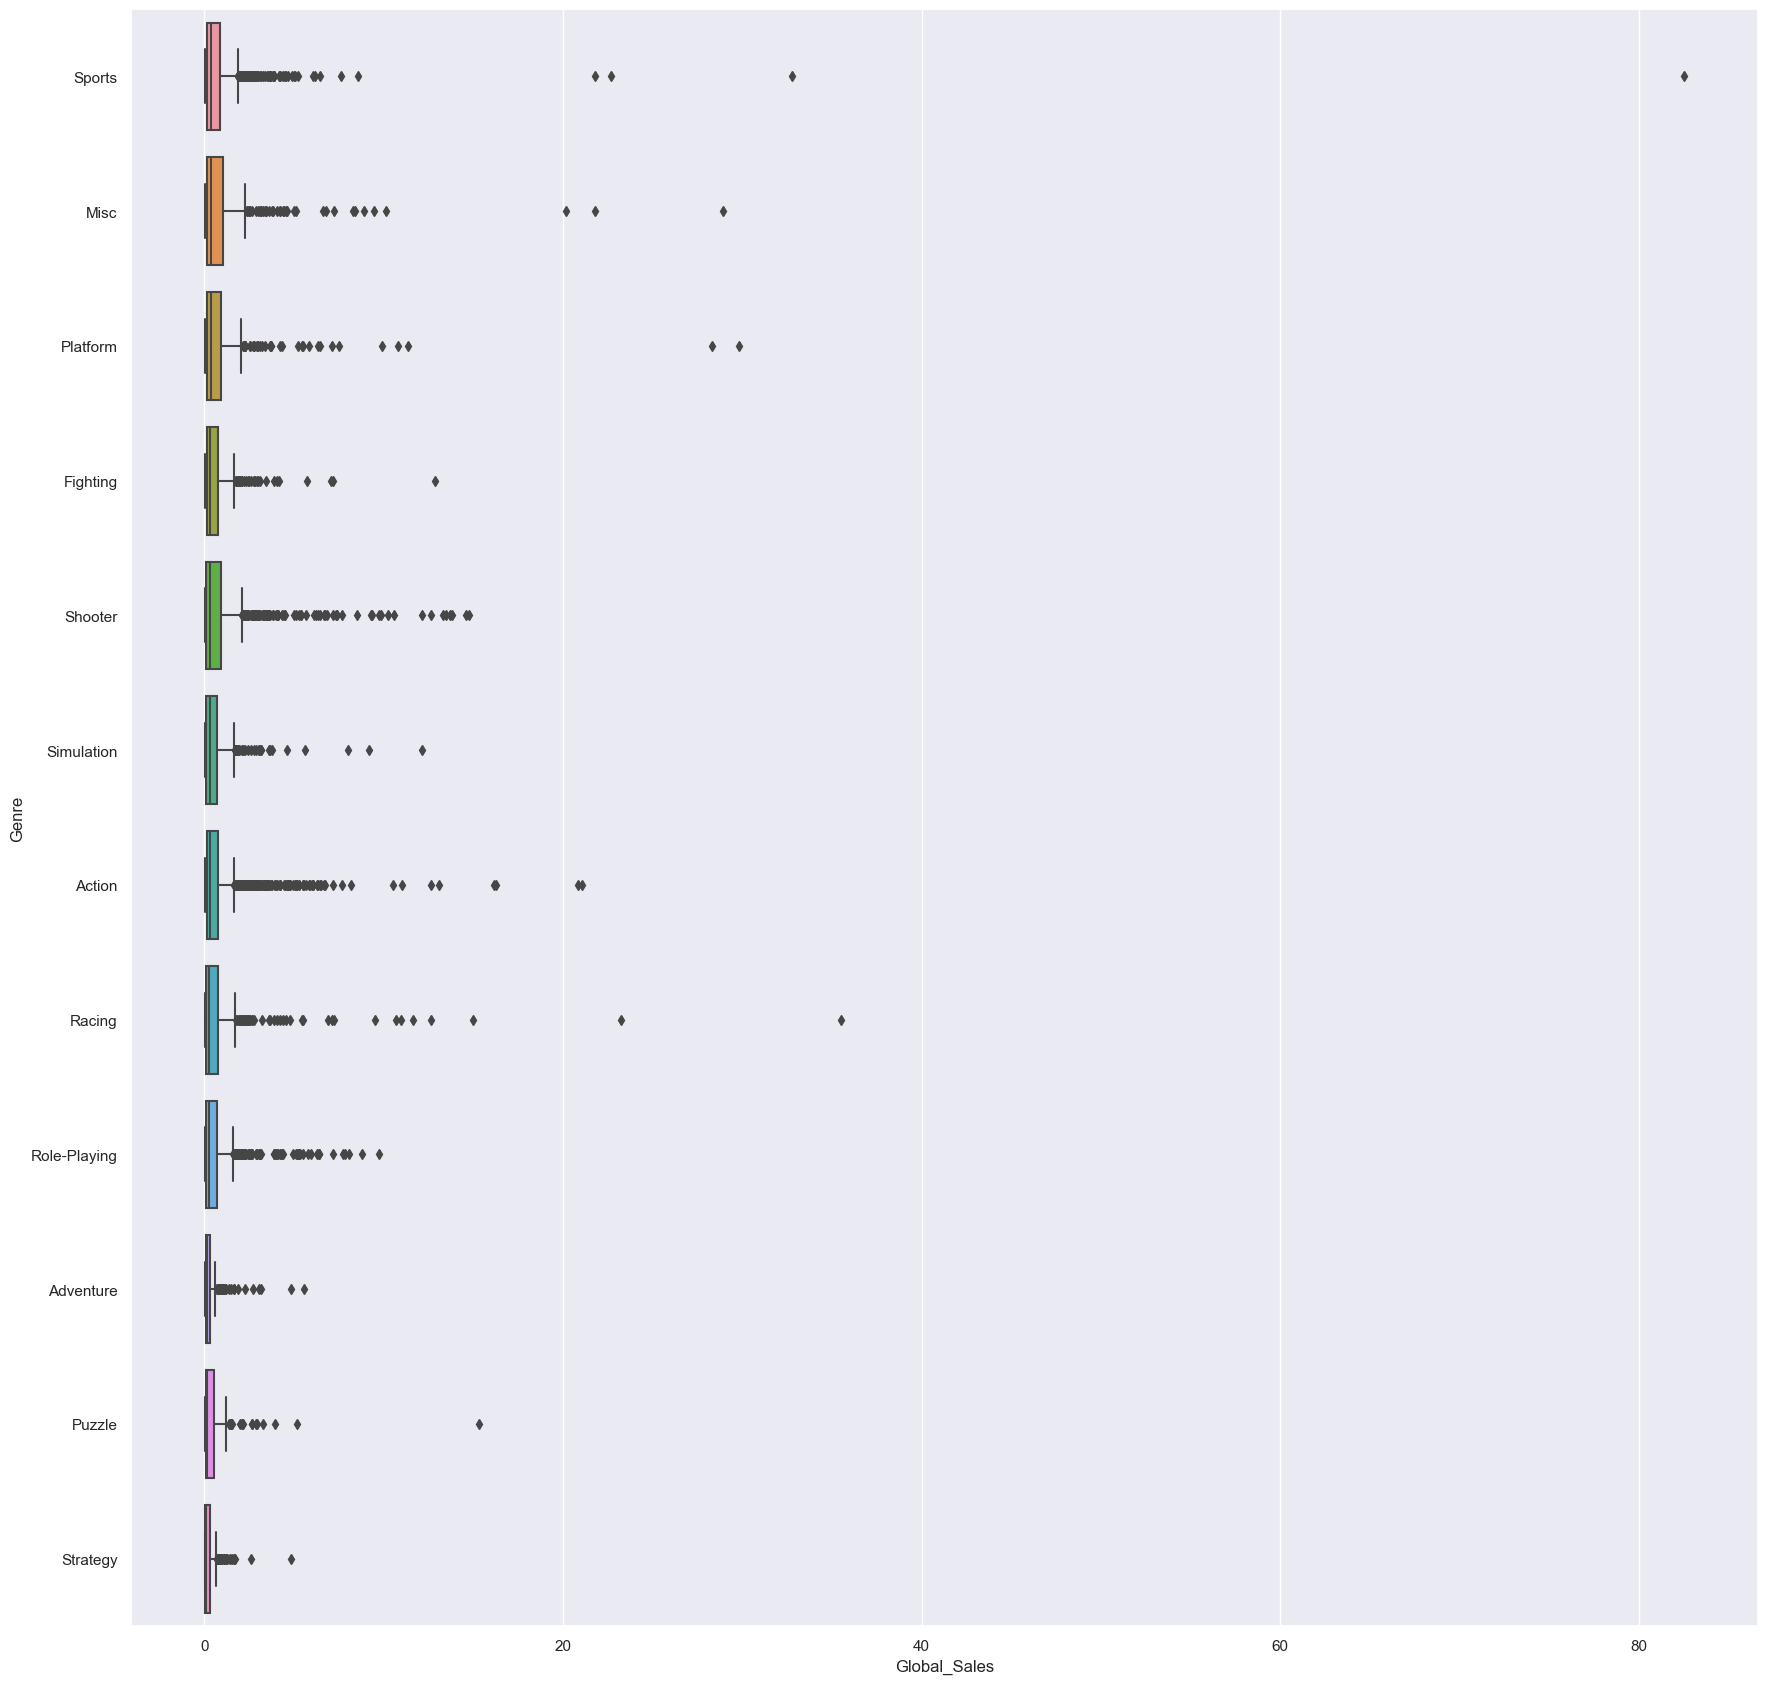

In [19]:
f=plt.figure(figsize=(21,21))
sb.boxplot(x='Global_Sales', y = 'Genre', orient='h', data = videoGamesSelectedCleaned, 
          order= videoGamesSelectedCleaned.groupby('Genre')['Global_Sales'].median().sort_values(ascending=False).index)


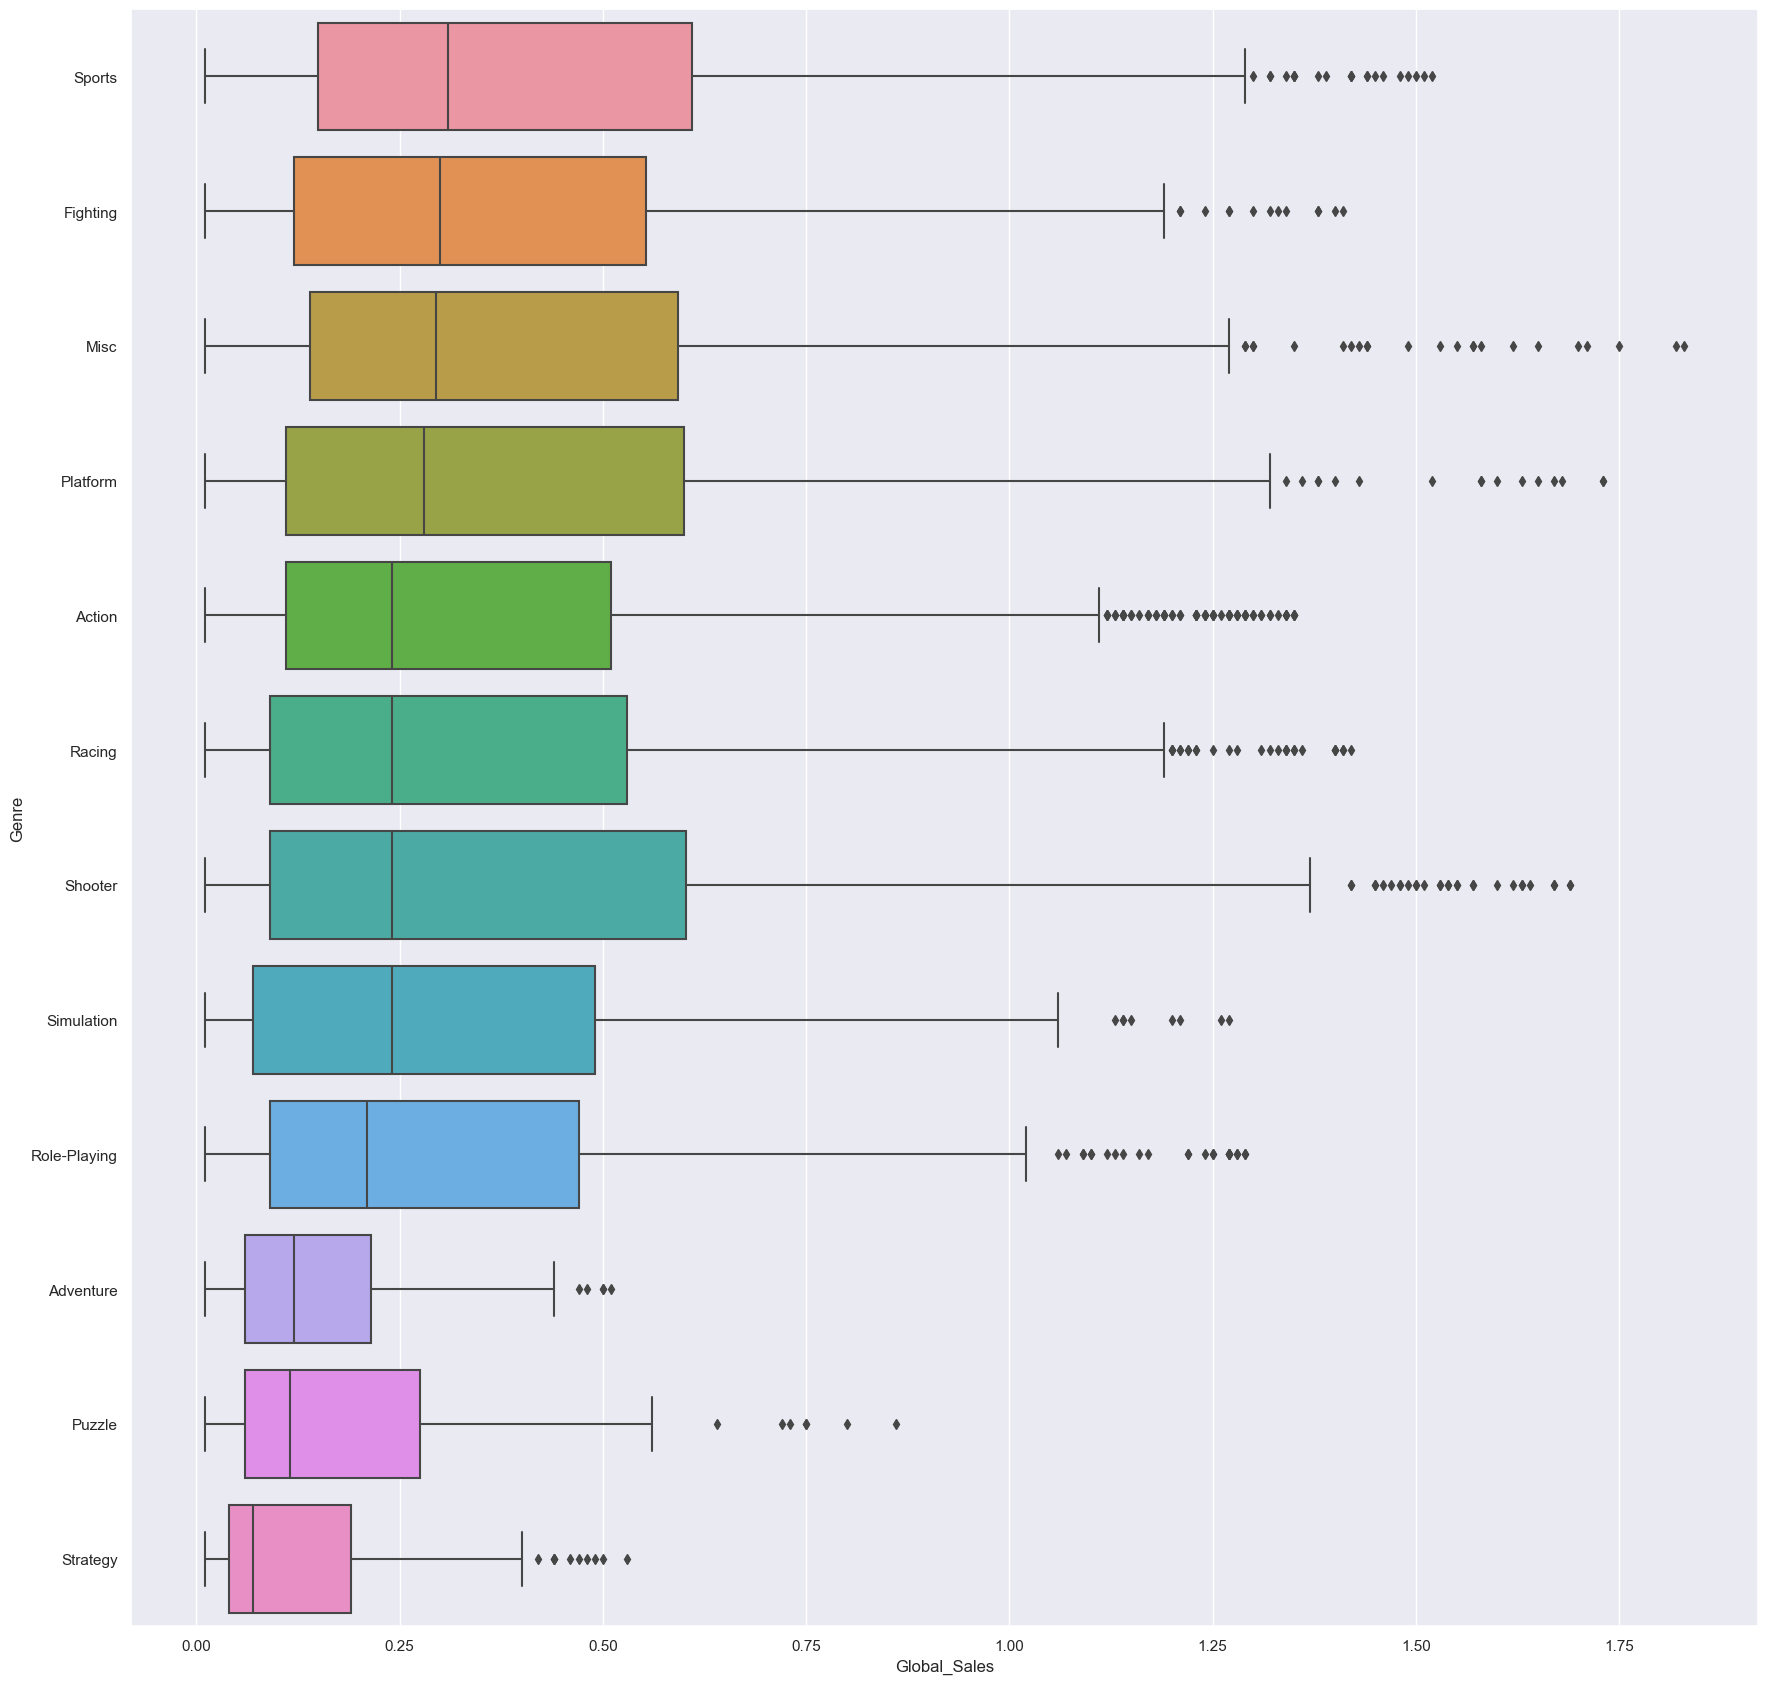

In [20]:
removeOutliers(videoGamesSelectedCleaned,'Genre','Global_Sales')

## reasonable distinctness?

### For platform

In [21]:
videoGamesSelectedCleaned['Platform'].nunique()

17

<AxesSubplot:xlabel='Global_Sales', ylabel='Platform'>

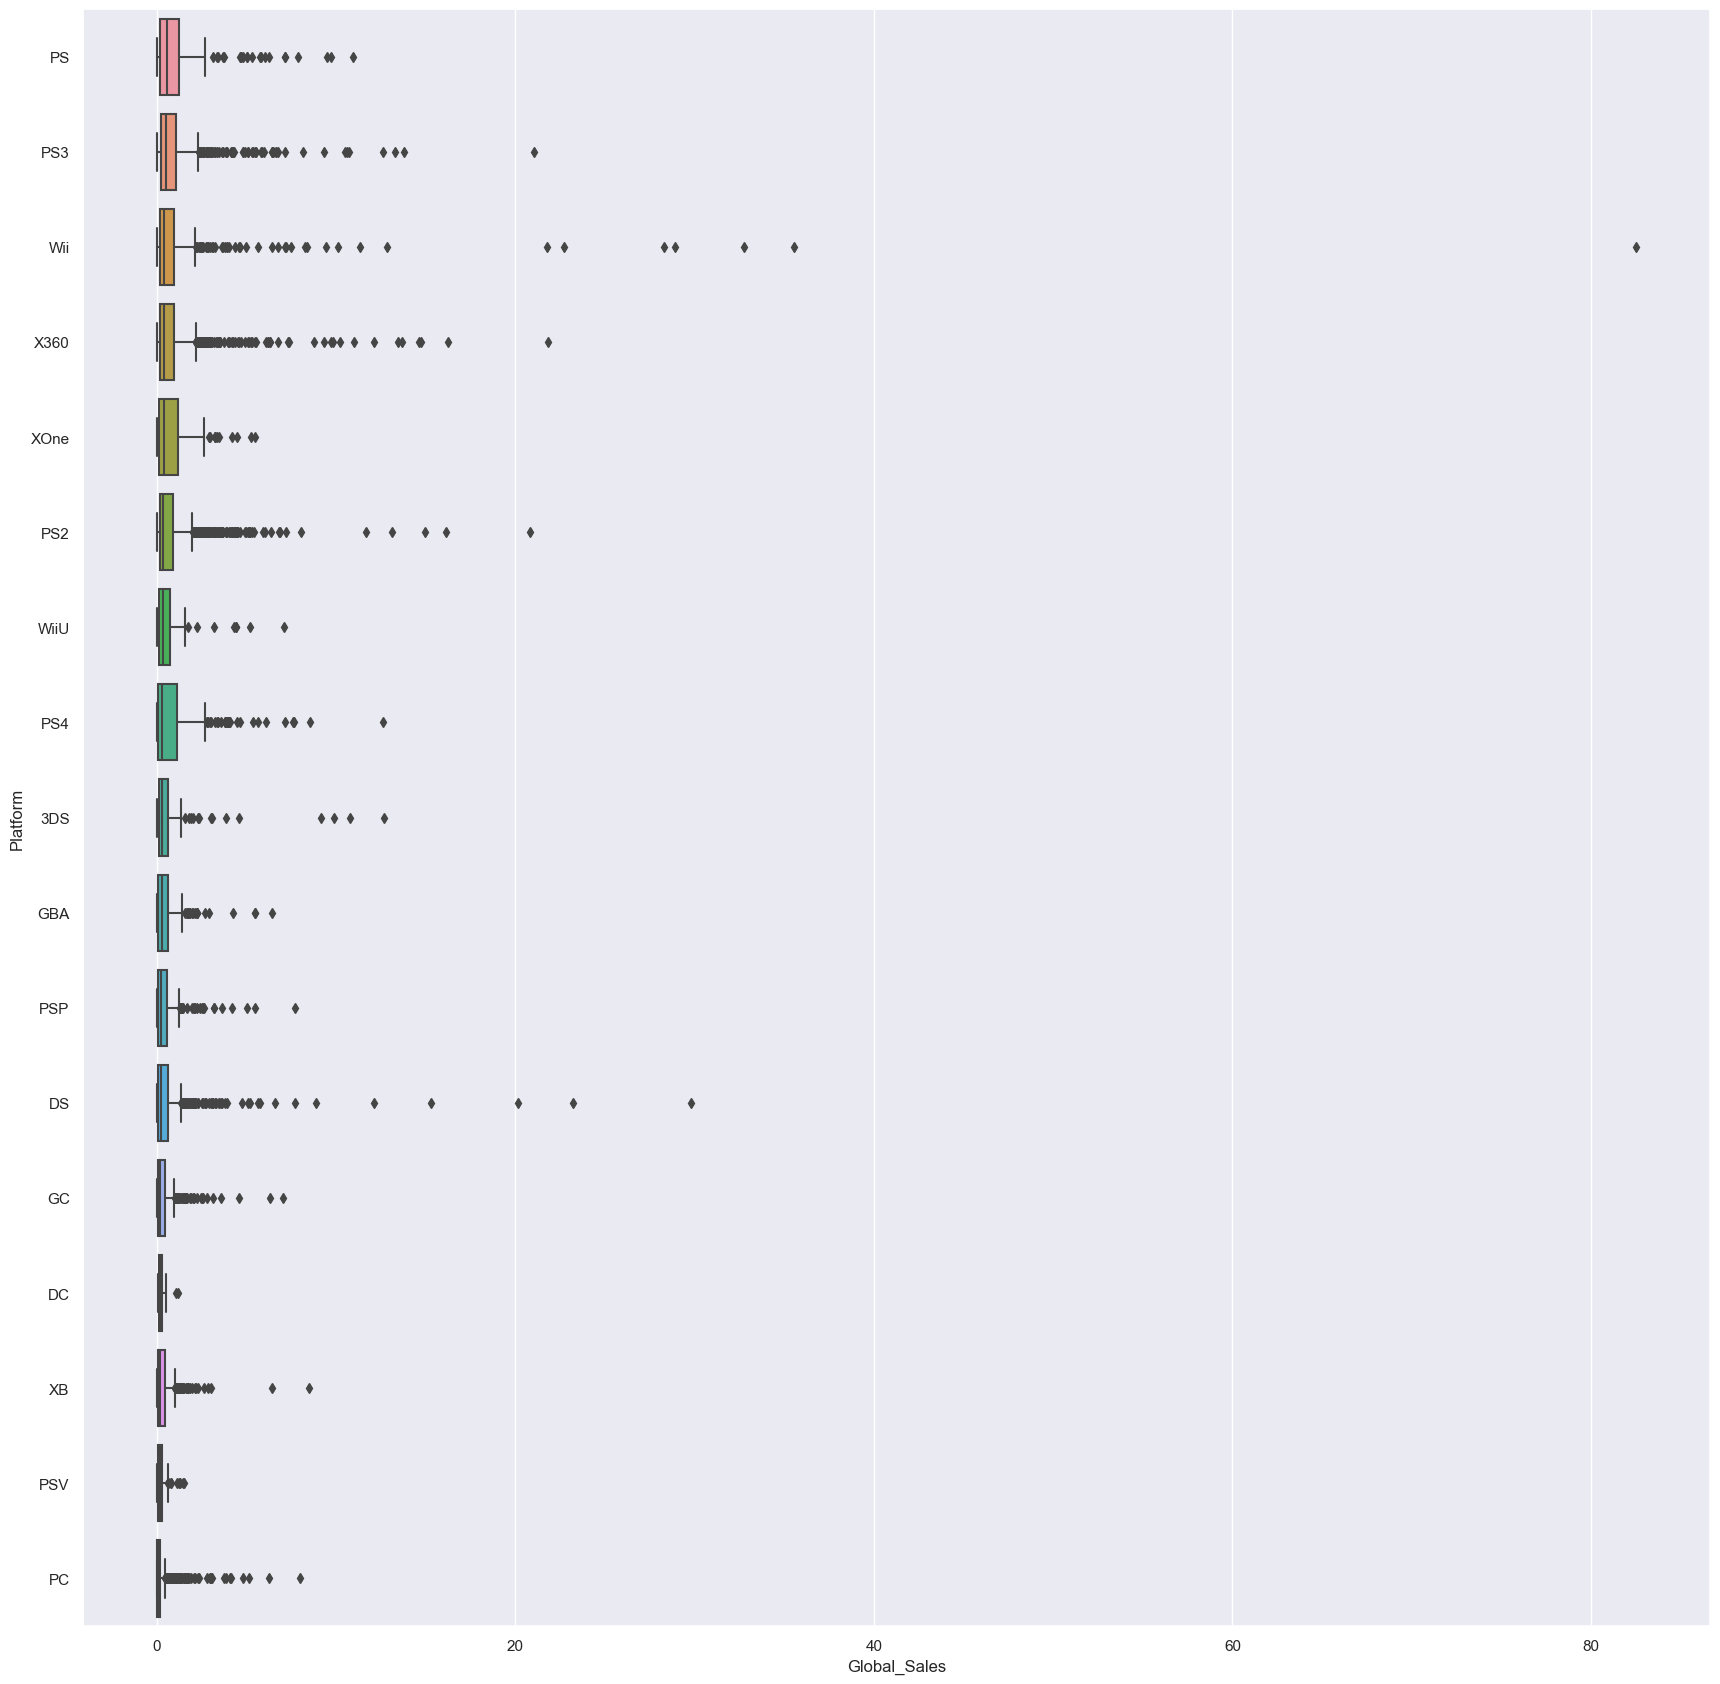

In [22]:
f=plt.figure(figsize=(21,21))
sb.boxplot(x='Global_Sales', y = 'Platform', orient='h', data = videoGamesSelectedCleaned, 
          order= videoGamesSelectedCleaned.groupby('Platform')['Global_Sales'].median().sort_values(ascending=False).index)


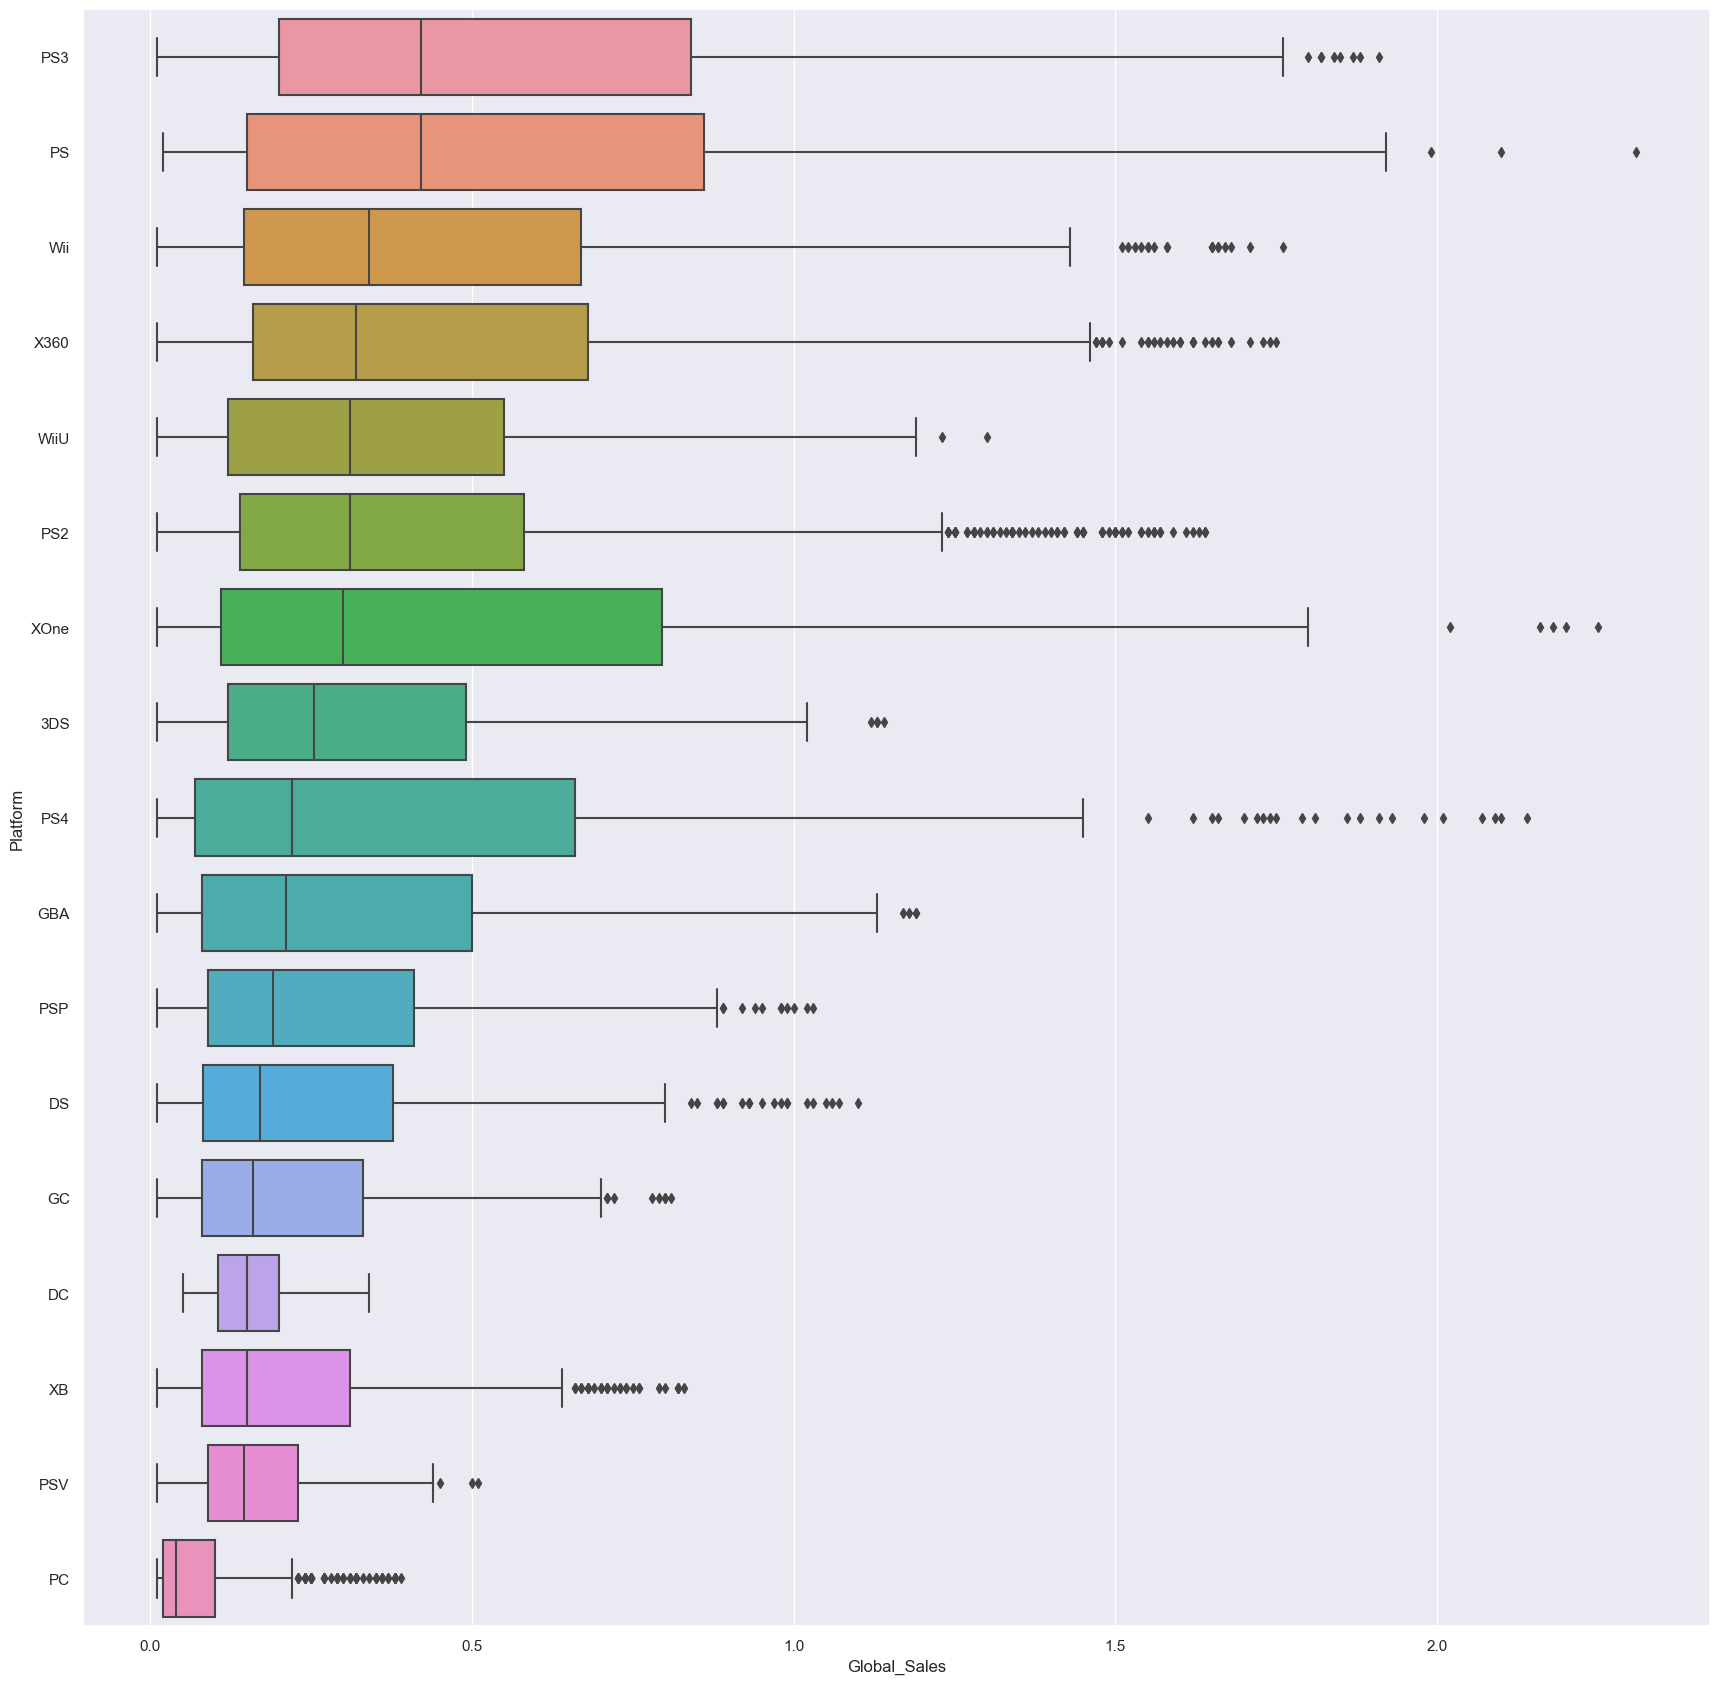

In [23]:
removeOutliers(videoGamesSelectedCleaned,'Platform','Global_Sales')

In [24]:
def removeOutliersIQR(df,column):
    df=df[(df[column]<=right(df[column])) & (df[column]>=left(df[column]))]
    return df

## 5. Machine Learning Models

In [25]:
newCleanedData = removeOutliersIQR(videoGamesSelectedCleaned,'Global_Sales')

### 1. Correlation

In [26]:
scoreSales = videoGamesSelectedCleaned[['Critic_Score','Global_Sales']]
newScoreSales = newCleanedData[['Critic_Score','Global_Sales']]

In [27]:
scoreSales.corr()


,Critic_Score,Global_Sales
Critic_Score,1.000000,0.237459
Global_Sales,0.237459,1.000000


In [28]:
newScoreSales.corr()

,Critic_Score,Global_Sales
Critic_Score,1.000000,0.274606
Global_Sales,0.274606,1.000000


<AxesSubplot:xlabel='Critic_Score', ylabel='Global_Sales'>

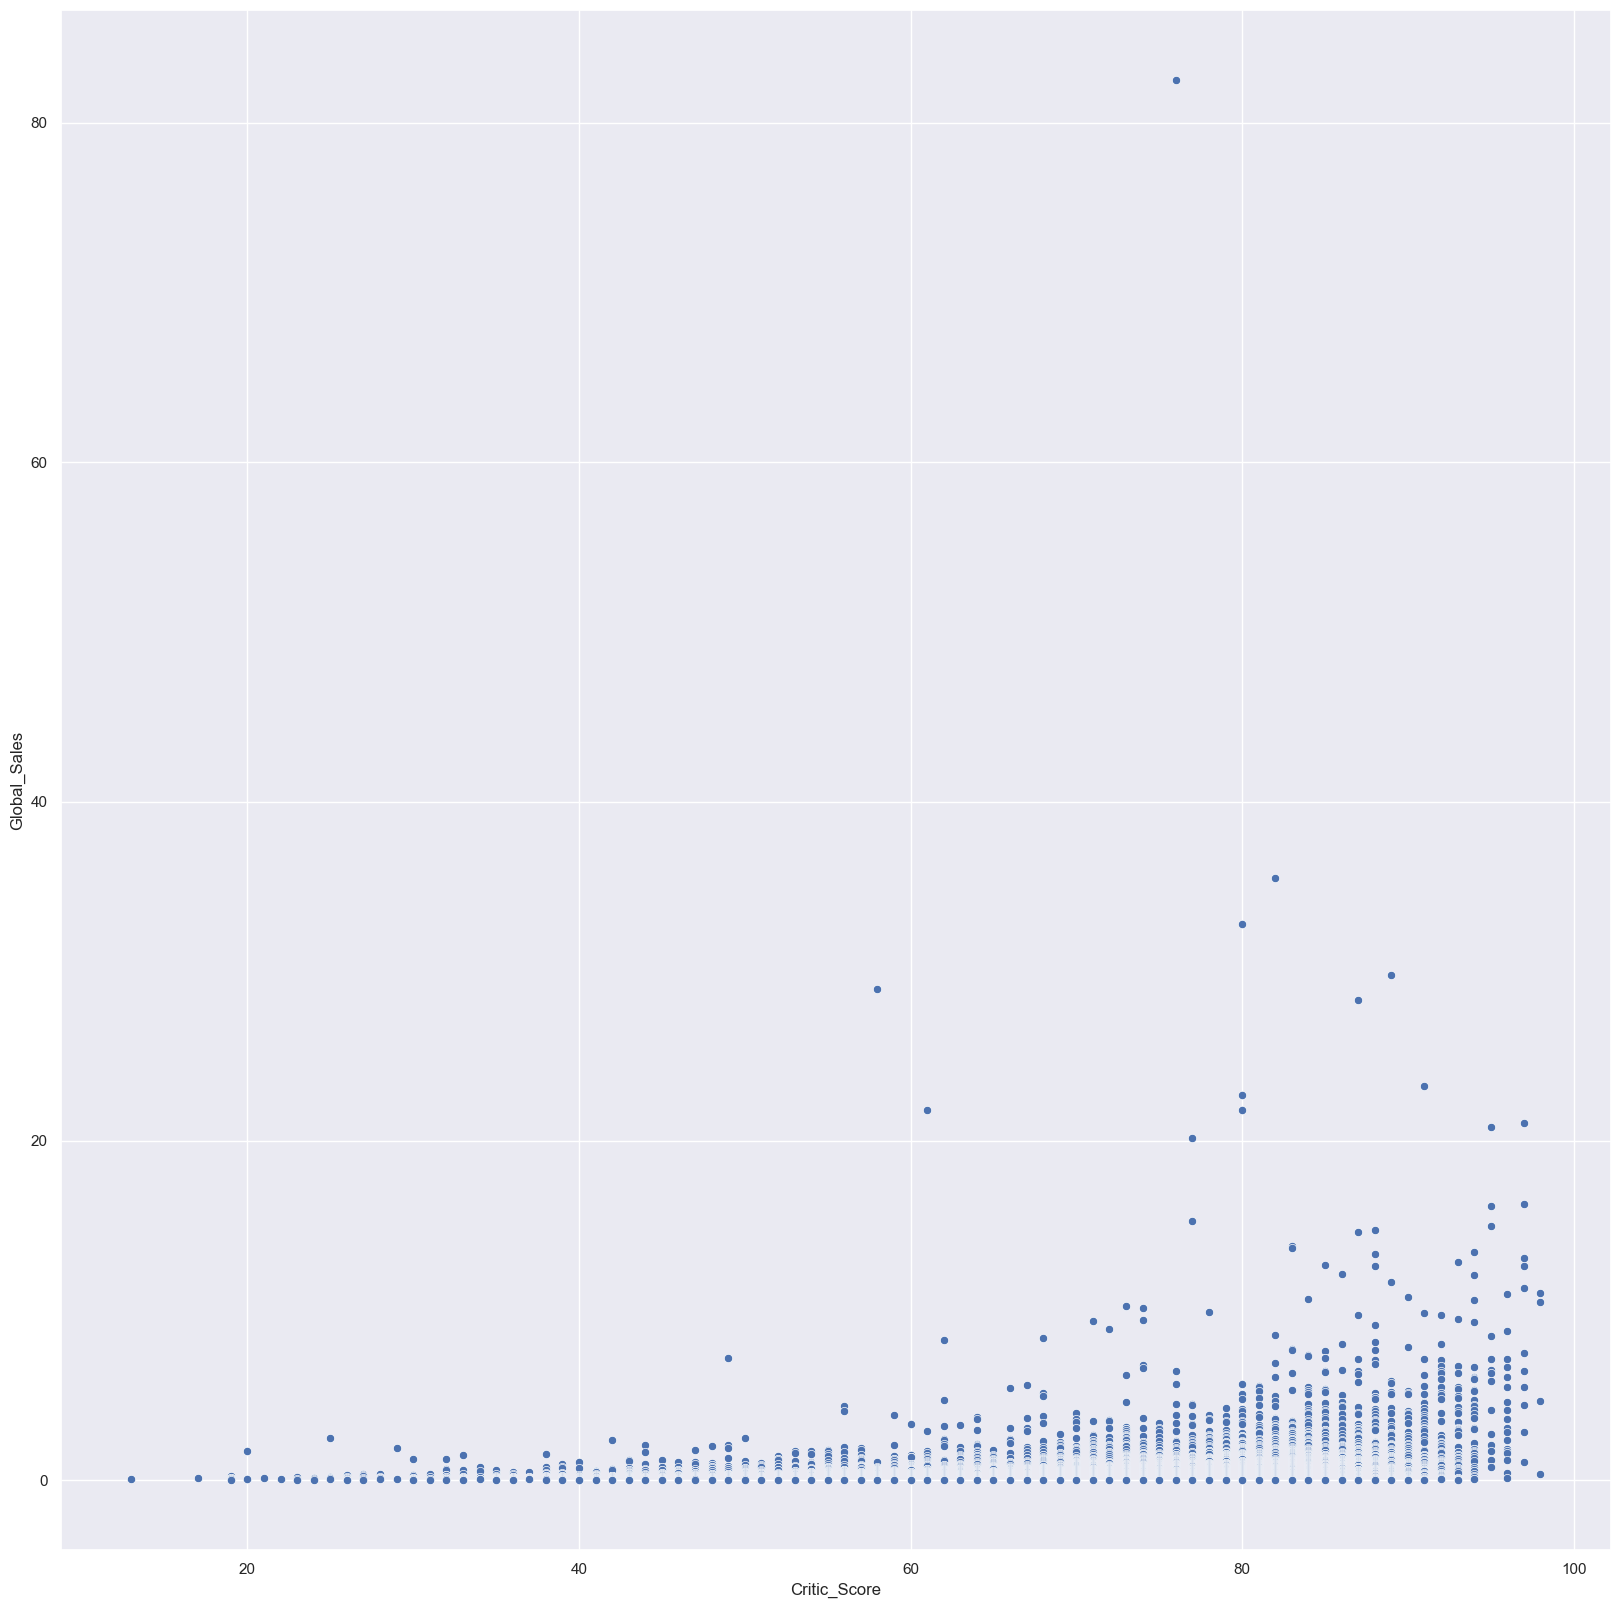

In [29]:
plt.figure(figsize=(20, 20))
sb.scatterplot(data=scoreSales, x = "Critic_Score", y = "Global_Sales")


<AxesSubplot:xlabel='Critic_Score', ylabel='Global_Sales'>

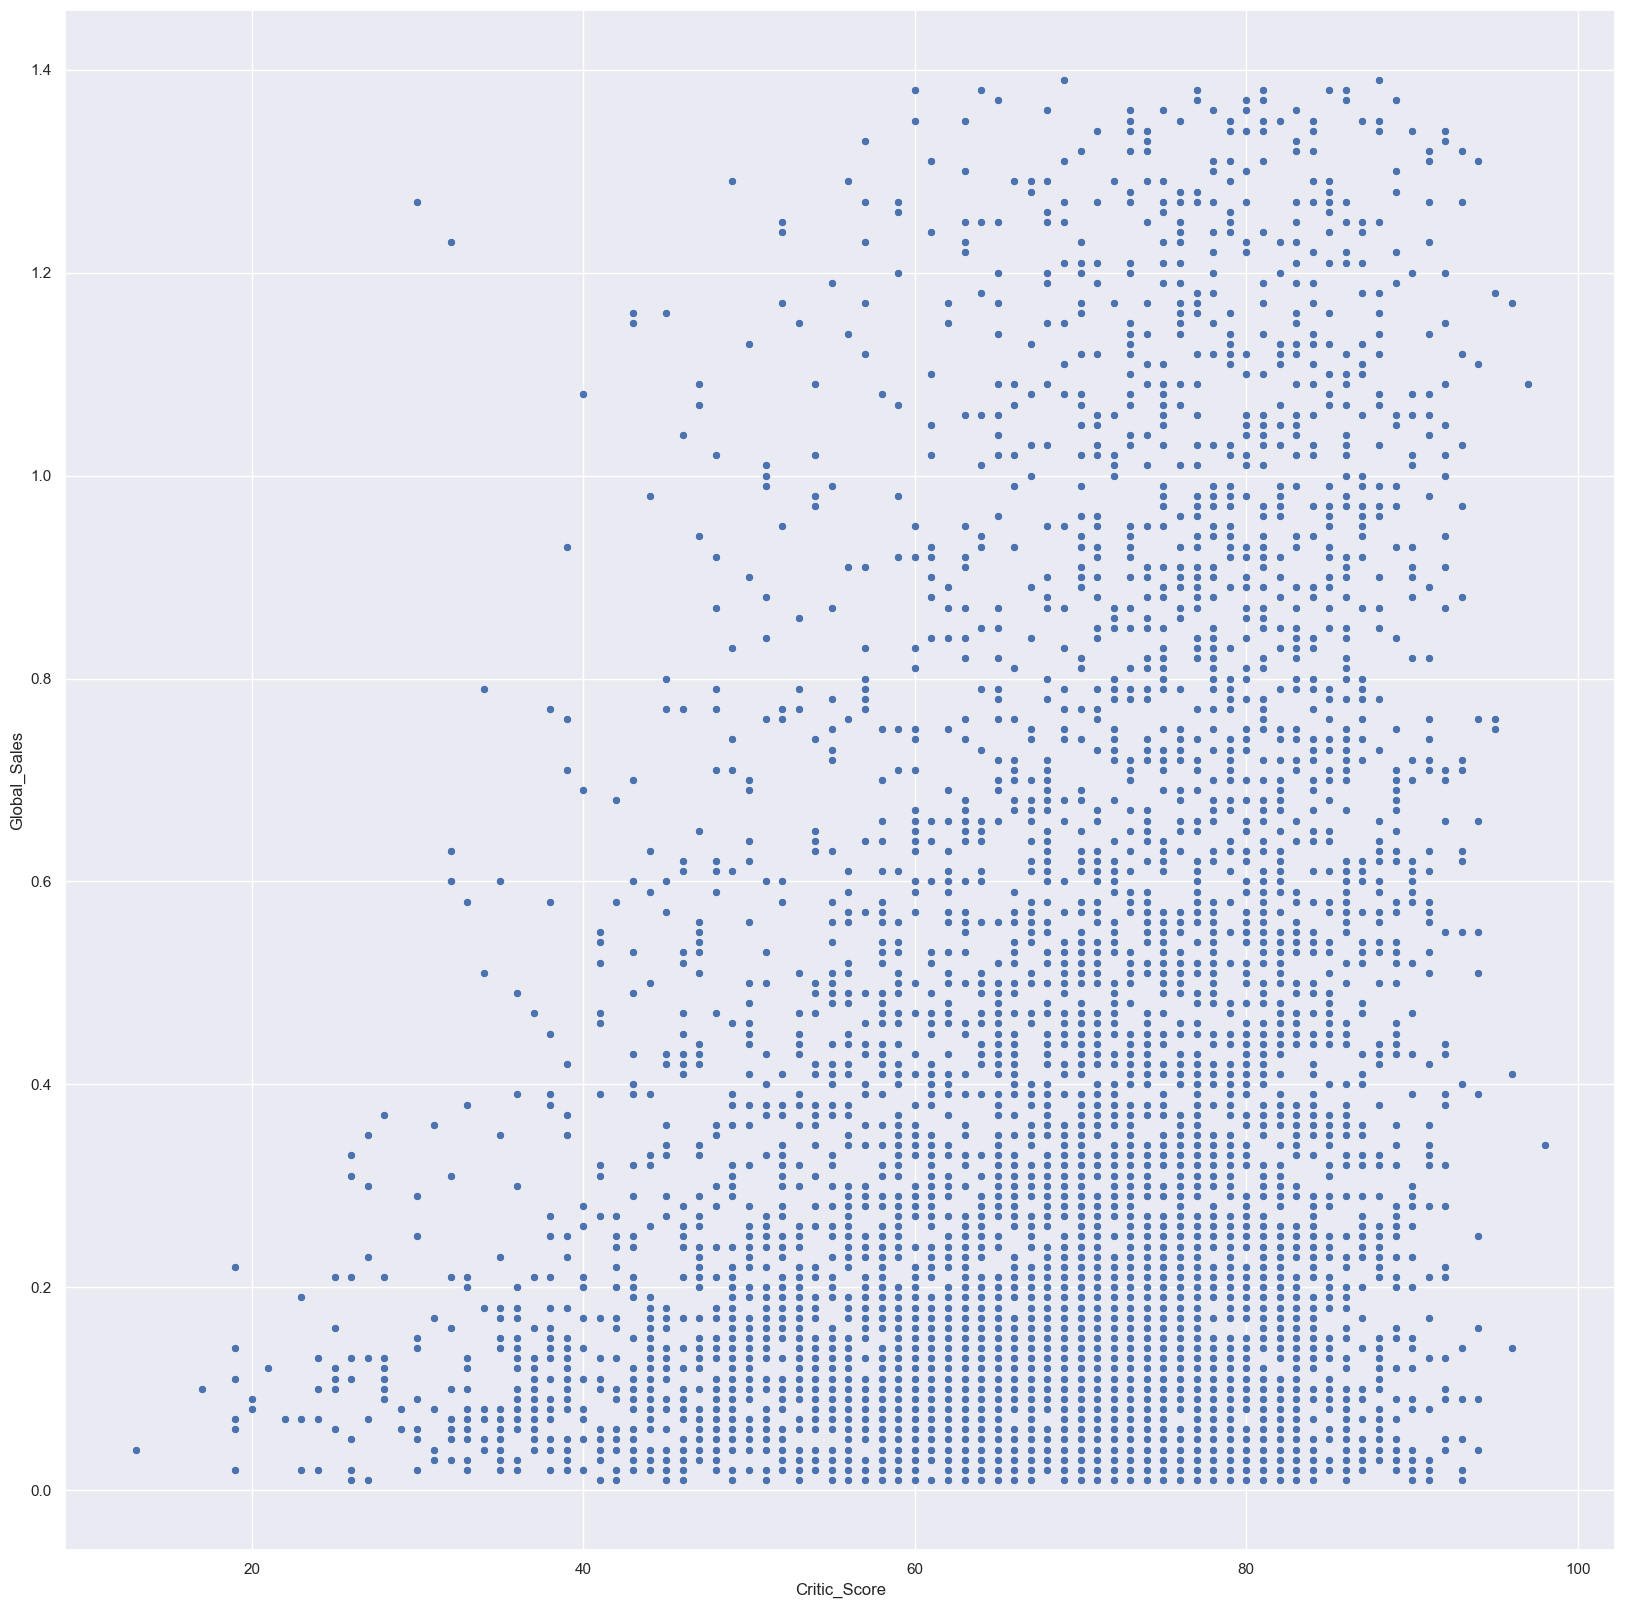

In [30]:
plt.figure(figsize=(20, 20))
sb.scatterplot(data=newScoreSales, x = "Critic_Score", y = "Global_Sales")

<AxesSubplot:xlabel='Critic_Score', ylabel='Density'>

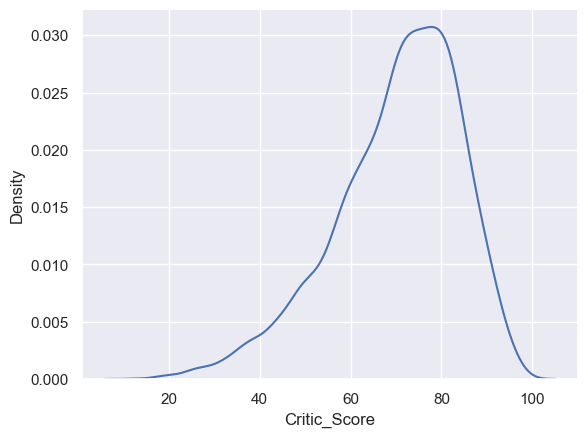

In [31]:
sb.kdeplot(data=scoreSales['Critic_Score'])

<AxesSubplot:xlabel='Critic_Score', ylabel='Density'>

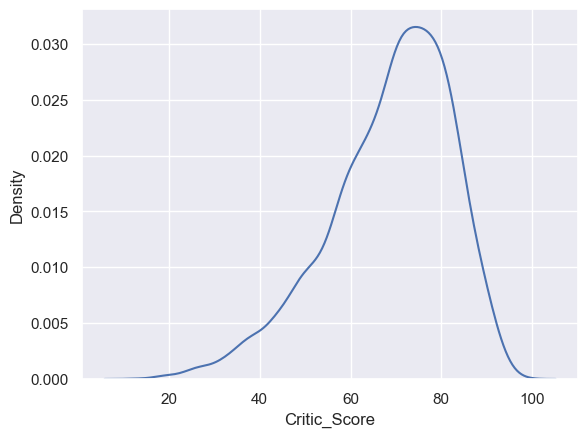

In [32]:
sb.kdeplot(data=newScoreSales['Critic_Score'])

## got .237 corr not great but become .275 after remove outliers



## userscore corr

In [33]:
scoreSales=videoGamesSelectedCleaned[['User_Score','Global_Sales']]
scoreSales.corr()


,User_Score,Global_Sales
User_Score,1.000000,0.088561
Global_Sales,0.088561,1.000000


## usercore corr without outliers

In [89]:
newScoreSales=newCleanedData[['User_Score','Global_Sales']]
newScoreSales.corr()


,User_Score,Global_Sales
User_Score,1.000000,0.130348
Global_Sales,0.130348,1.000000


### 2. Linear Regression

In [90]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

# Create a Linear Regression object
linreg = LinearRegression()



train = newCleanedData.sample(frac=.8)
test = newCleamedData.drop(train.index)


cs_train = pd.DataFrame(train['Critic_Score'])
cs_test = pd.DataFrame(test['Critic_Score'])
gs_train = pd.DataFrame(train['Global_Sales'])
gs_test = pd.DataFrame(test['Global_Sales'])


Intercept of Regression 	: b =  [-0.10667342]
Coefficients of Regression 	: a =  [[0.00672655]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.07519799363575475
Mean Squared Error (MSE) 	: 0.10304502103486346

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.07492657508713985
Mean Squared Error (MSE) 	: 0.10024436733644876



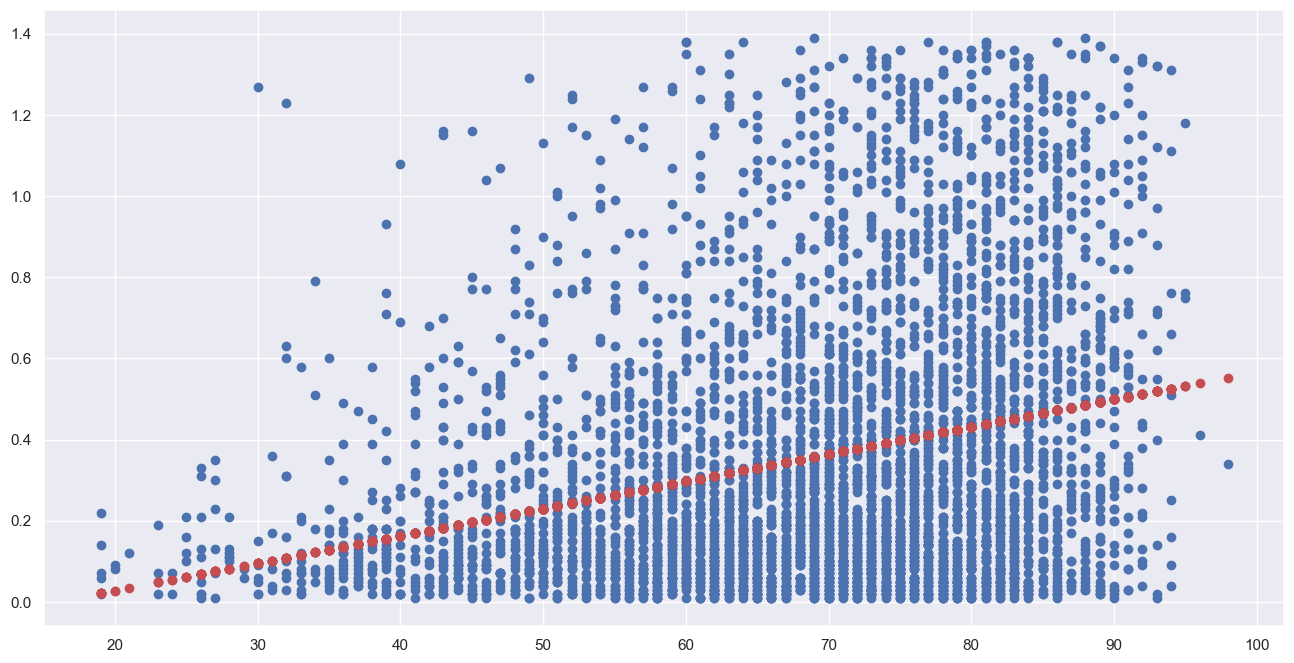

In [91]:

linreg.fit(cs_train, gs_train)
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
gs_train_pred = linreg.predict(cs_train)
gs_test_pred = linreg.predict(cs_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(cs_train, gs_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(gs_train, gs_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(cs_test, gs_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(gs_test, gs_test_pred))
print()


f = plt.figure(figsize=(16, 8))
plt.scatter(cs_train, gs_train)
plt.scatter(cs_train, gs_train_pred, color = "r")
plt.show()

### 3. Decision Tree

Predicting Rating by global sales

Train Classification Accuracy: 0.38081455447591483
Test Classification Accuracy: 0.3639371381306865


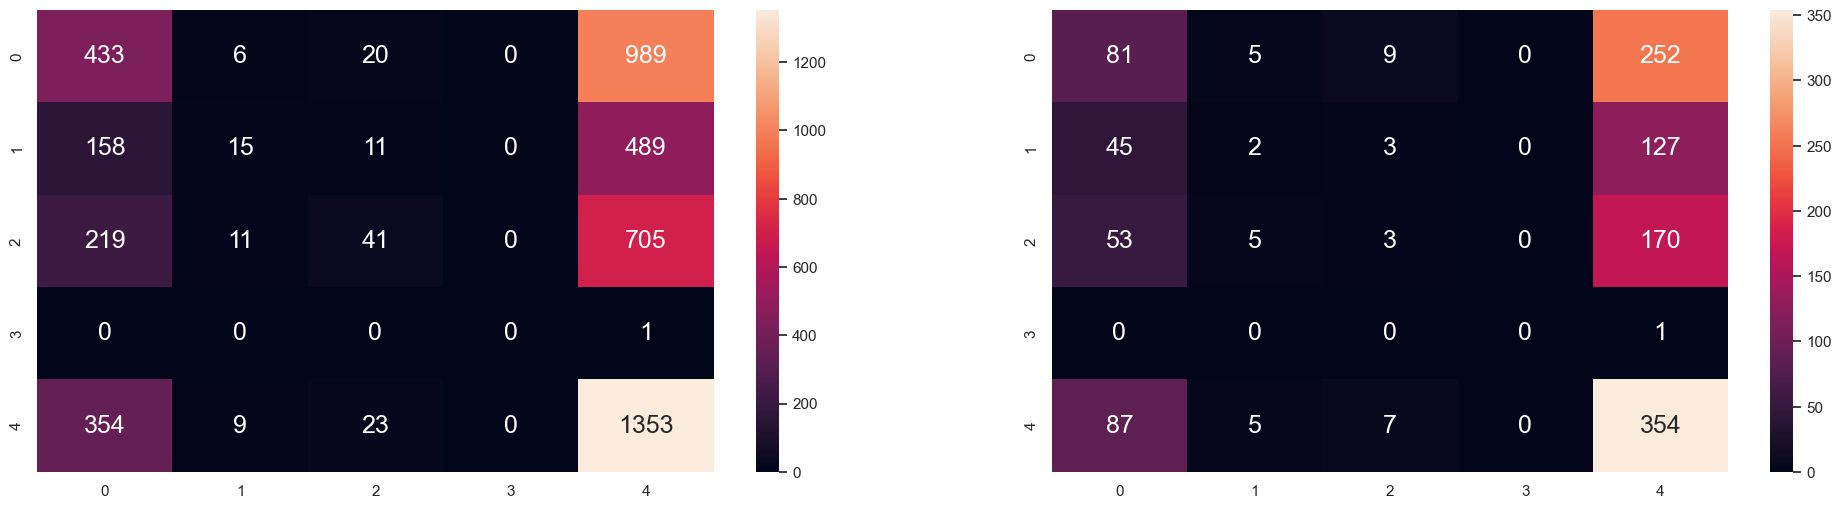

In [92]:

ra_train = pd.DataFrame(train['Rating'])
ra_test = pd.DataFrame(test['Rating'])
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object

dectree2 = DecisionTreeClassifier(max_depth = 8)

# Train the Decision Tree Classifier model

dectree2.fit(gs_train,ra_train)



from sklearn.tree import export_graphviz
dot_data2 = export_graphviz(dectree2, out_file=None, 
                                feature_names = gs_train.columns,
                                filled=True,
                               class_names=['E', 'M', 'T', 'E10+', 'AO', 'K-A', 'RP'])


import graphviz                          
graphviz.Source(dot_data2)

train_pred2 = dectree2.predict(gs_train)
test_pred2 = dectree2.predict(gs_test)

print("Train Classification Accuracy:",dectree2.score(gs_train,ra_train))
print("Test Classification Accuracy:",dectree2.score(gs_test,ra_test))
from sklearn.metrics import confusion_matrix
f, axes = plt.subplots(1, 2, figsize=(24, 6))
train_m = confusion_matrix(ra_train,train_pred2)
test_m = confusion_matrix(ra_test,test_pred2)
sb.heatmap(train_m,annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[0])
sb.heatmap(test_m,annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[1])
plt.show()




Predicting Rating by Genre and global_sales

Train Classification Accuracy: 0.5850733925987183
Test Classification Accuracy: 0.5310173697270472


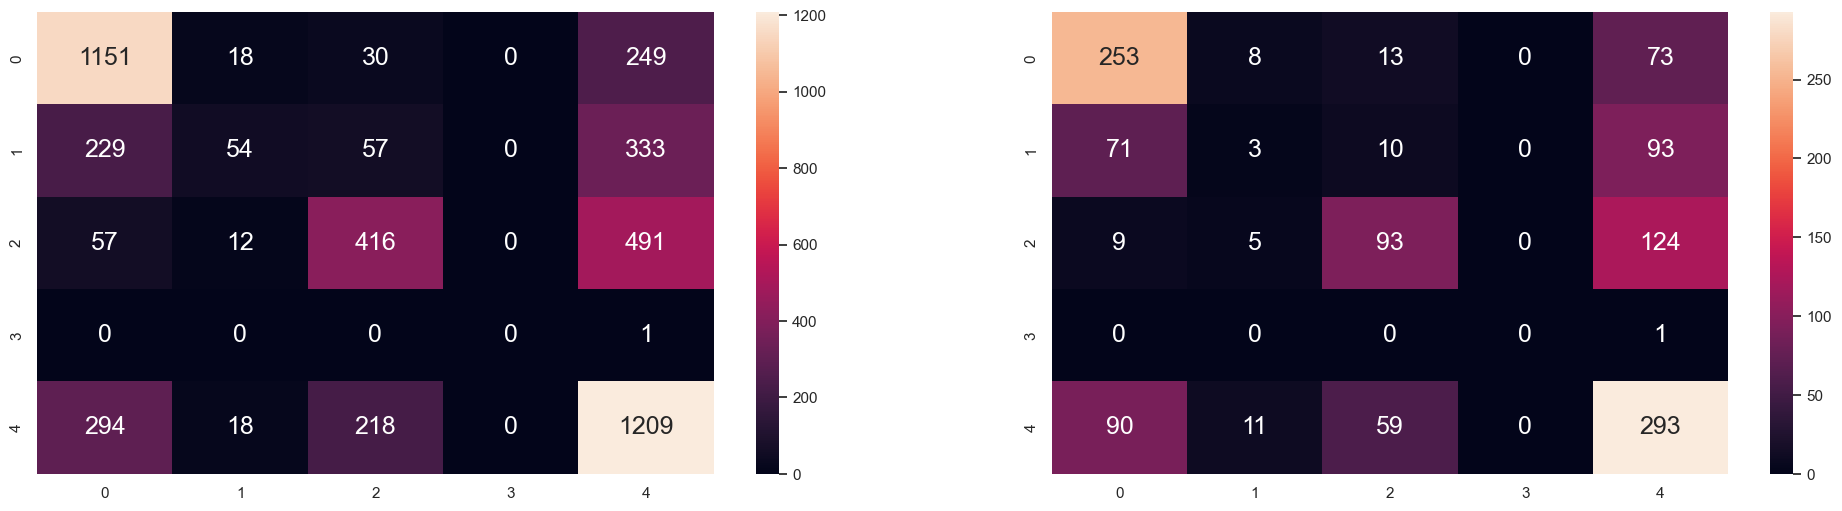

In [93]:
gegs_train = pd.DataFrame(train[['Genre','Global_Sales']])
gegs_test = pd.DataFrame(test[['Genre','Global_Sales']])
type(gegs_train)
gegs_train['Genre'].replace(['Sports', 'Racing', 'Platform', 'Misc', 'Action', 'Puzzle',
       'Shooter', 'Fighting', 'Simulation', 'Role-Playing', 'Adventure',
       'Strategy'],[0,1,2,3,4,5,6,7,8,9,10,11], inplace=True)

gegs_test['Genre'].replace(['Sports', 'Racing', 'Platform', 'Misc', 'Action', 'Puzzle',
       'Shooter', 'Fighting', 'Simulation', 'Role-Playing', 'Adventure',
       'Strategy'],[0,1,2,3,4,5,6,7,8,9,10,11], inplace=True)

dectree2.fit(gegs_train,ra_train)

dot_data2 = export_graphviz(dectree2, out_file=None, 
                                feature_names = gegs_train.columns,
                                filled=True,
                               class_names=['E', 'M', 'T', 'E10+', 'AO', 'K-A', 'RP'])

train_pred2 = dectree2.predict(gegs_train)
test_pred2 = dectree2.predict(gegs_test)
print("Train Classification Accuracy:",dectree2.score(gegs_train,ra_train))
print("Test Classification Accuracy:",dectree2.score(gegs_test,ra_test))
f, axes = plt.subplots(1, 2, figsize=(24, 6))
train_m = confusion_matrix(ra_train,train_pred2)
test_m = confusion_matrix(ra_test,test_pred2)
sb.heatmap(train_m,annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[0])
sb.heatmap(test_m,annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[1])
plt.show()

### 4. Random Forest

C:\Users\Msi\AppData\Local\Temp\ipykernel_10744\4214845017.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(gs_train,ra_train)


Train Classification Accuracy: 0.38577630762869547
Test Classification Accuracy: 0.3639371381306865


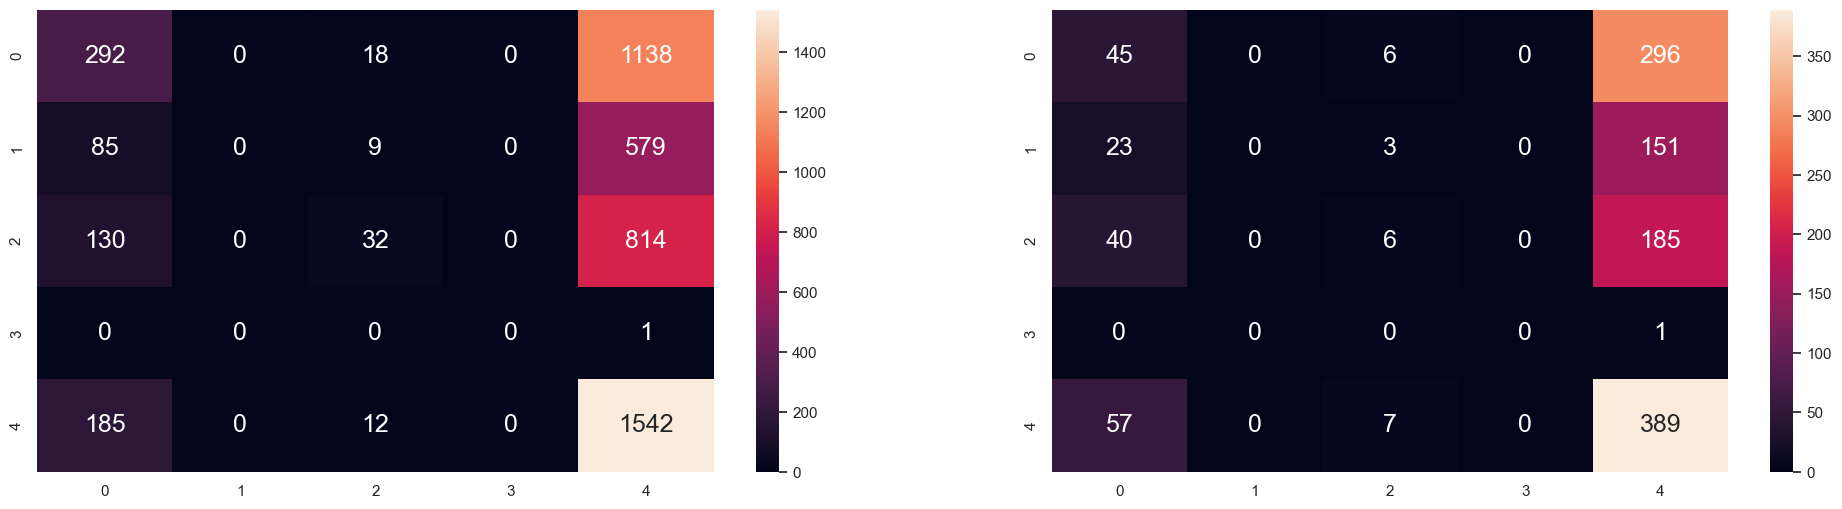

In [95]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=0)
rfc.fit(gs_train,ra_train)
train_pred2 = rfc.predict(gs_train)
test_pred2 = rfc.predict(gs_test)
print("Train Classification Accuracy:",rfc.score(gs_train,ra_train))
print("Test Classification Accuracy:",rfc.score(gs_test,ra_test))
f, axes = plt.subplots(1, 2, figsize=(24, 6))
train_m = confusion_matrix(ra_train,train_pred2)
test_m = confusion_matrix(ra_test,test_pred2)
sb.heatmap(train_m,annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[0])
sb.heatmap(test_m,annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[1])
plt.show()


### 5. Neural Network

Neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates.

Neural networks are flexible and can be used for both classification and regression. So we want to discover whether it will be better for our prediction.

C:\Users\Msi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Classification Accuracy: 0.3602808786460209
Test Classification Accuracy: 0.3570914326853852


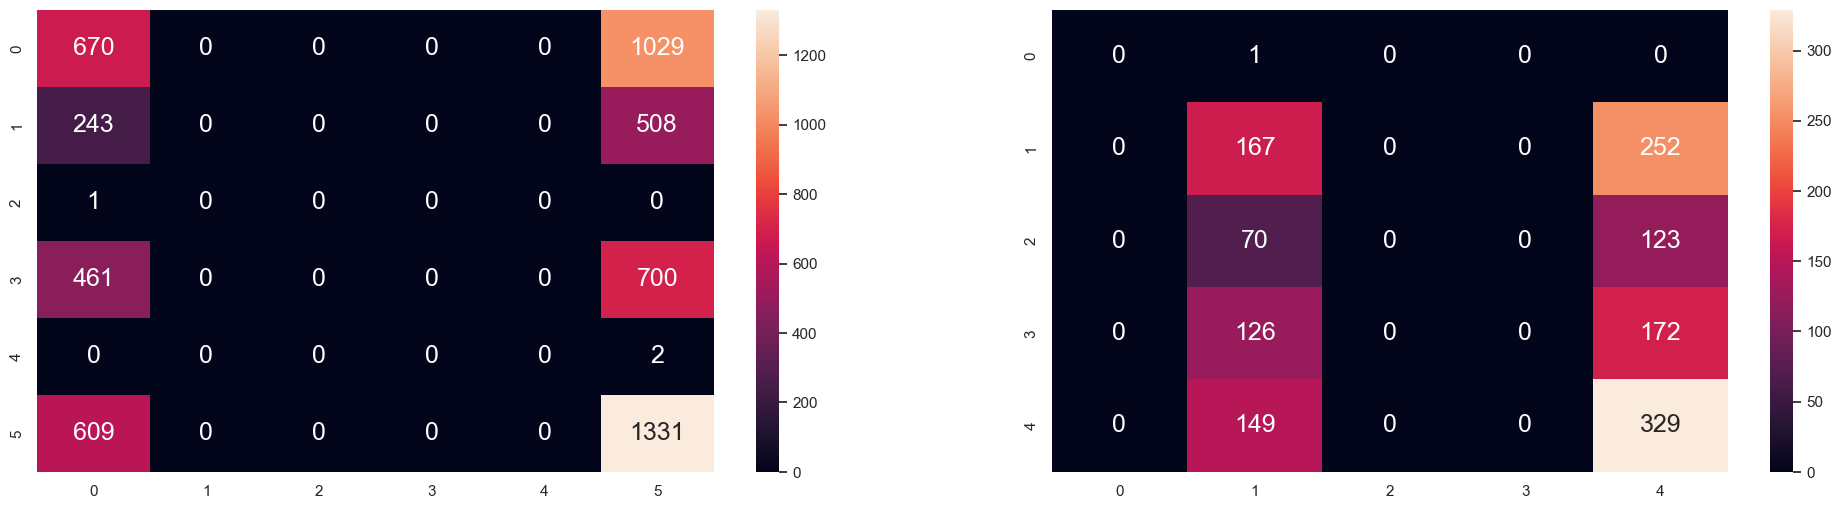

In [39]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),max_iter=500,activation = 'relu',solver='adam',random_state=1)
mlp.fit(gs_train,ra_train)
train_pred2 = mlp.predict(gs_train)
test_pred2 = mlp.predict(gs_test)
print("Train Classification Accuracy:",mlp.score(gs_train,ra_train))
print("Test Classification Accuracy:",mlp.score(gs_test,ra_test))
f, axes = plt.subplots(1, 2, figsize=(24, 6))
train_m = confusion_matrix(ra_train,train_pred2)
test_m = confusion_matrix(ra_test,test_pred2)
sb.heatmap(train_m,annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[0])
sb.heatmap(test_m,annot = True, fmt=".0f", annot_kws={"size": 18},ax = axes[1])
plt.show()


## 6. Additional Research Question

Assume that there is a Japan developer who wants tp publish a game in the global market, based on the data, what kind of game should he/she publish?
Nintendo is the largest game developer in Japan, therefore in our analysis, we will only consider the games published by Nintendo.

In [40]:
# Select the games published by Nintendo
japan_data = videoGamesSelectedCleaned[videoGamesSelectedCleaned['Publisher'] == 'Nintendo']

In [41]:
# View all the genres of the games published by Nintendo
japan_data['Genre'].unique()

array(['Sports', 'Racing', 'Platform', 'Misc', 'Puzzle', 'Fighting',
       'Simulation', 'Role-Playing', 'Action', 'Shooter', 'Adventure',
       'Strategy'], dtype=object)

There are total of 12 genres of games, we can try to combine some of them to make the analysis easier.
We can combine the genres of 'Fighting', 'Shooter', 'Sports', 'Racing' 'Action' into one genre 'Action'.
We can combine the genres of 'Puzzle', 'Simulation', 'Strategy' into one genre 'Puzzle'.
We can combine the genres of 'Role-Playing', 'Adventure' into one genre 'Adventure'.

C:\Users\Msi\AppData\Local\Temp\ipykernel_10744\3236419559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  japan_data['Genre'] = japan_data['Genre'].replace(['Fighting', 'Shooter', 'Sports', 'Racing', 'Action'], 'Action')
C:\Users\Msi\AppData\Local\Temp\ipykernel_10744\3236419559.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  japan_data['Genre'] = japan_data['Genre'].replace(['Puzzle', 'Simulation', 'Strategy'], 'Puzzle')
C:\Users\Msi\AppData\Local\Temp\ipykernel_10744\3236419559.py:4: SettingWithC

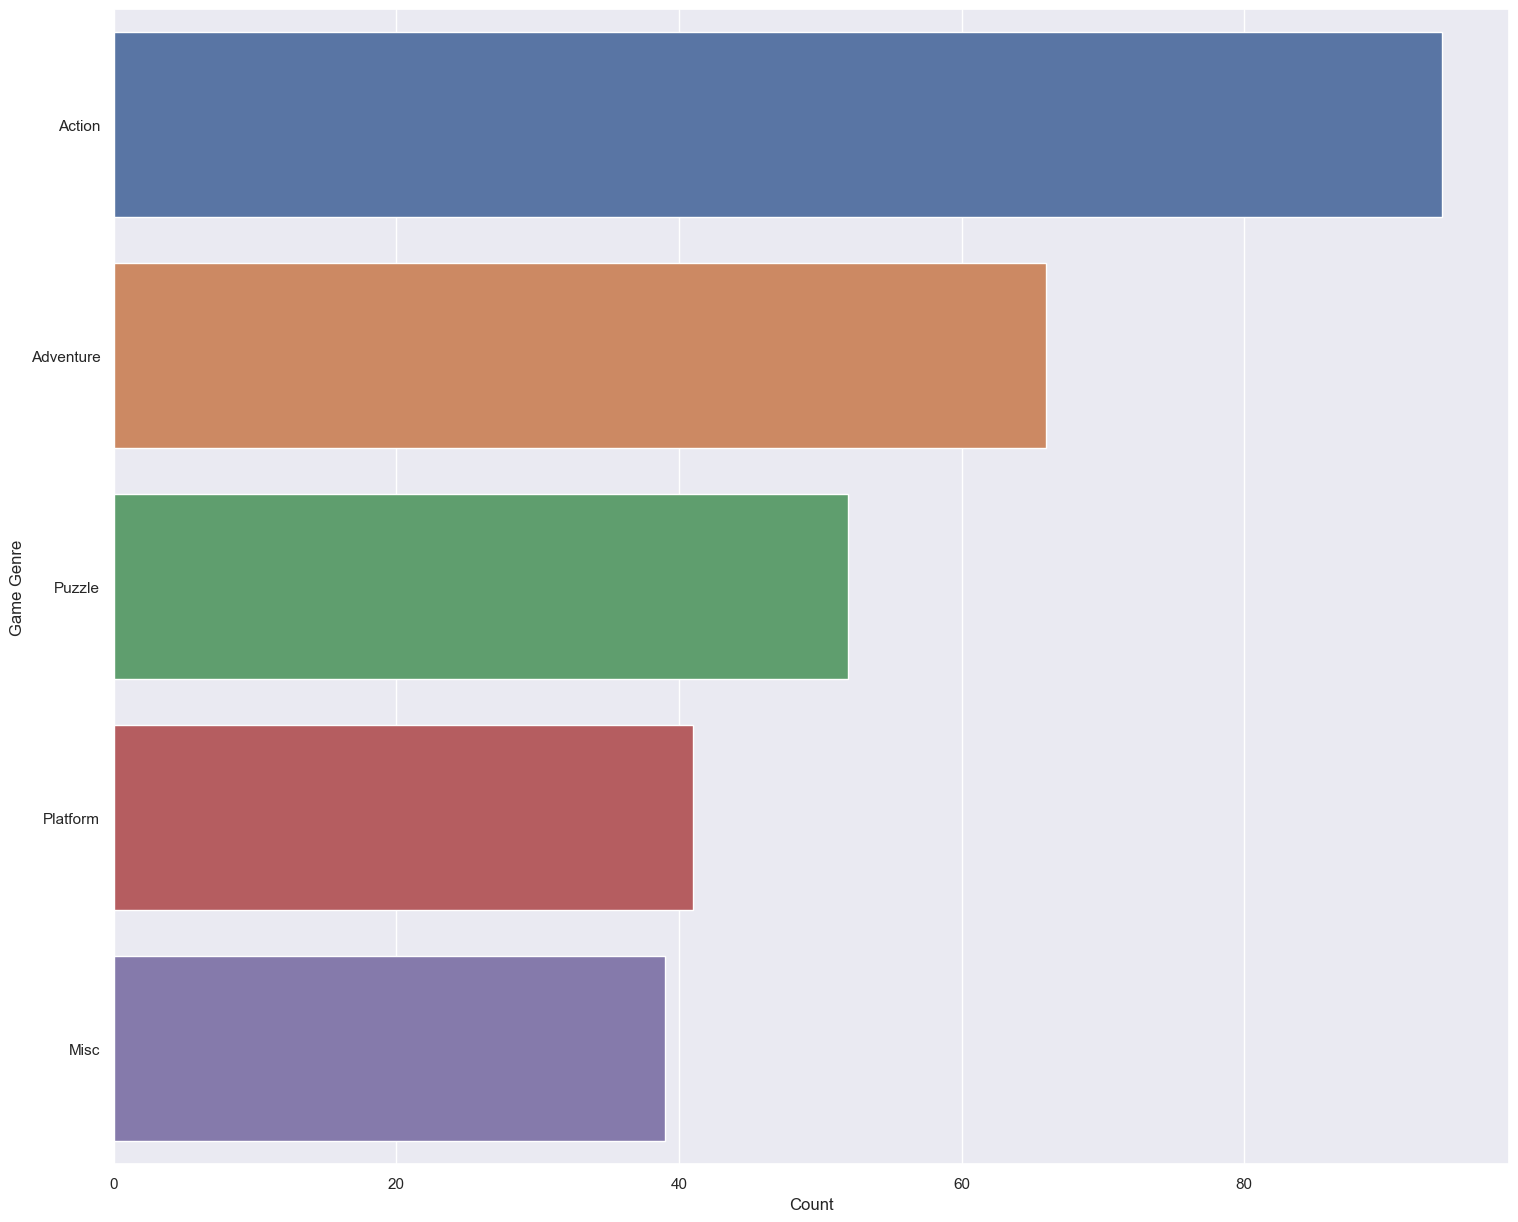

In [42]:
# Merge the genres into 4 categories
japan_data['Genre'] = japan_data['Genre'].replace(['Fighting', 'Shooter', 'Sports', 'Racing', 'Action'], 'Action')
japan_data['Genre'] = japan_data['Genre'].replace(['Puzzle', 'Simulation', 'Strategy'], 'Puzzle')
japan_data['Genre'] = japan_data['Genre'].replace(['Role-Playing', 'Adventure'], 'Adventure')

# View the new genres
japan_count = pd.DataFrame()
japan_count = japan_data.loc[:,'Genre'].value_counts()
japan_count = japan_count.to_frame()
japan_count['Game Genre'] = japan_count.index
japan_count = japan_count.rename(columns = {'Genre' : 'Count'})

plt.figure(figsize=(18, 15))
sb.set(font_scale = 1)
sb.barplot(data = japan_count, x = 'Count', y = 'Game Genre')
plt.show()

From the bar plot, we can see that the most popular genre of games published by Nintendo is 'Action' games, followed by 'Puzzle' games and 'Adventure' games.

Then, we move on to find the correlation between japan sales and global sales.

In [43]:
NA_Global=japan_data[['JP_Sales','Global_Sales']]
NA_Global.corr()

,JP_Sales,Global_Sales
JP_Sales,1.000000,0.738087
Global_Sales,0.738087,1.000000


The correlation between Japan sales and global sales is 0.738, which is a strong positive correlation.

Then, we can convert the genre of the games into dummy variables, such that genre can be converted as a numeric variable.

In [44]:
japan_data = pd.get_dummies(japan_data, columns=['Genre'])
japan_data.head()

,Platform,Publisher,Critic_Score,Global_Sales,User_Score,Rating,JP_Sales,Genre_Action,Genre_Adventure,Genre_Misc,Genre_Platform,Genre_Puzzle
0,Wii,Nintendo,76.0,82.53,8.0,E,3.77,1,0,0,0,0
2,Wii,Nintendo,82.0,35.52,8.3,E,3.79,1,0,0,0,0
3,Wii,Nintendo,80.0,32.77,8.0,E,3.28,1,0,0,0,0
6,DS,Nintendo,89.0,29.80,8.5,E,6.50,0,0,0,1,0
7,Wii,Nintendo,58.0,28.92,6.6,E,2.93,0,0,1,0,0


In [45]:
japan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 0 to 16656
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Platform         292 non-null    object 
 1   Publisher        292 non-null    object 
 2   Critic_Score     292 non-null    float64
 3   Global_Sales     292 non-null    float64
 4   User_Score       292 non-null    float64
 5   Rating           292 non-null    object 
 6   JP_Sales         292 non-null    float64
 7   Genre_Action     292 non-null    uint8  
 8   Genre_Adventure  292 non-null    uint8  
 9   Genre_Misc       292 non-null    uint8  
 10  Genre_Platform   292 non-null    uint8  
 11  Genre_Puzzle     292 non-null    uint8  
dtypes: float64(4), object(3), uint8(5)
memory usage: 19.7+ KB


#### For the best Global Sales:

In [46]:
y = pd.DataFrame(japan_data["Global_Sales"])
X = pd.DataFrame(japan_data[['Genre_Action','Genre_Adventure','Genre_Misc','Genre_Platform','Genre_Puzzle']])

<AxesSubplot:>

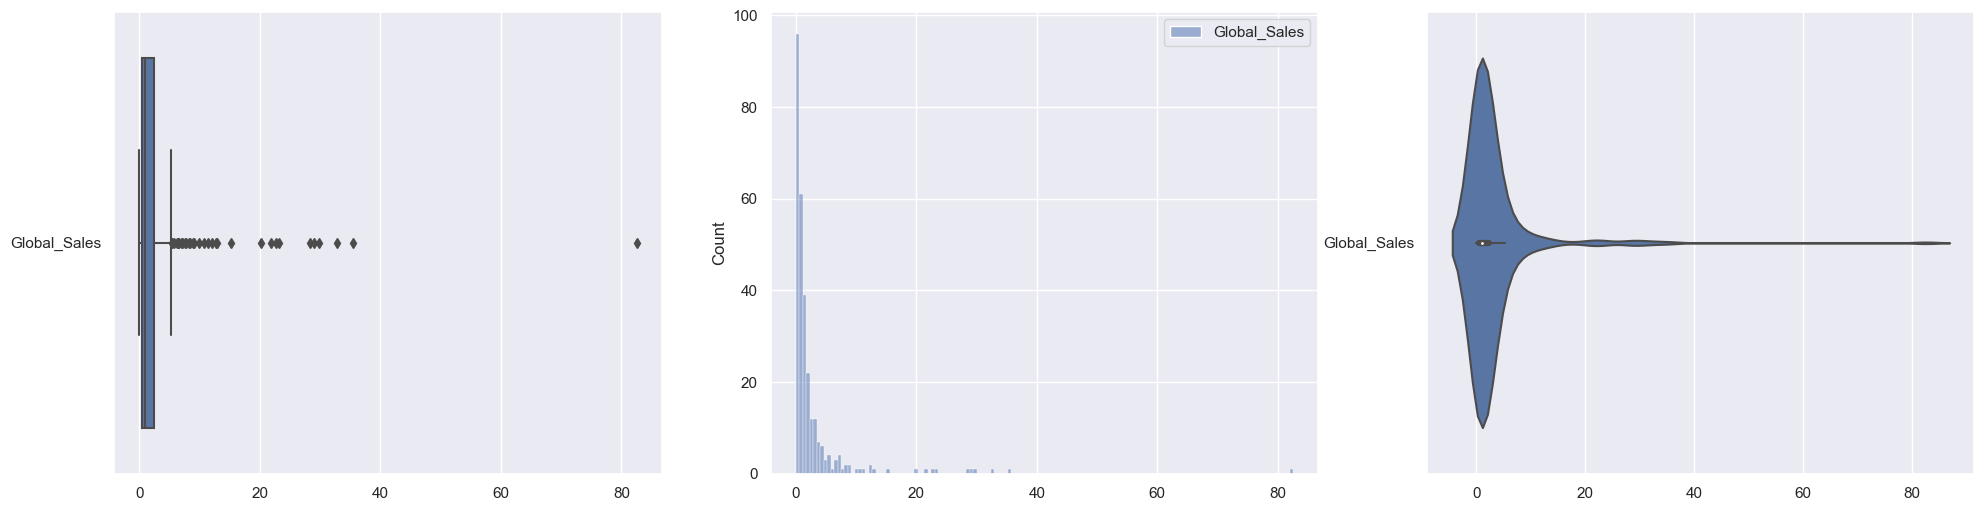

In [47]:
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = y, orient = "h", ax = axes[0])
sb.histplot(data = y, ax = axes[1])
sb.violinplot(data = y, orient = "h", ax = axes[2])

In [48]:
y.skew()

Global_Sales    6.93457
dtype: float64

#### Reduce skew using log transform:

In [49]:
y=np.log(y)
y.skew()

Global_Sales   -0.010741
dtype: float64

<AxesSubplot:>

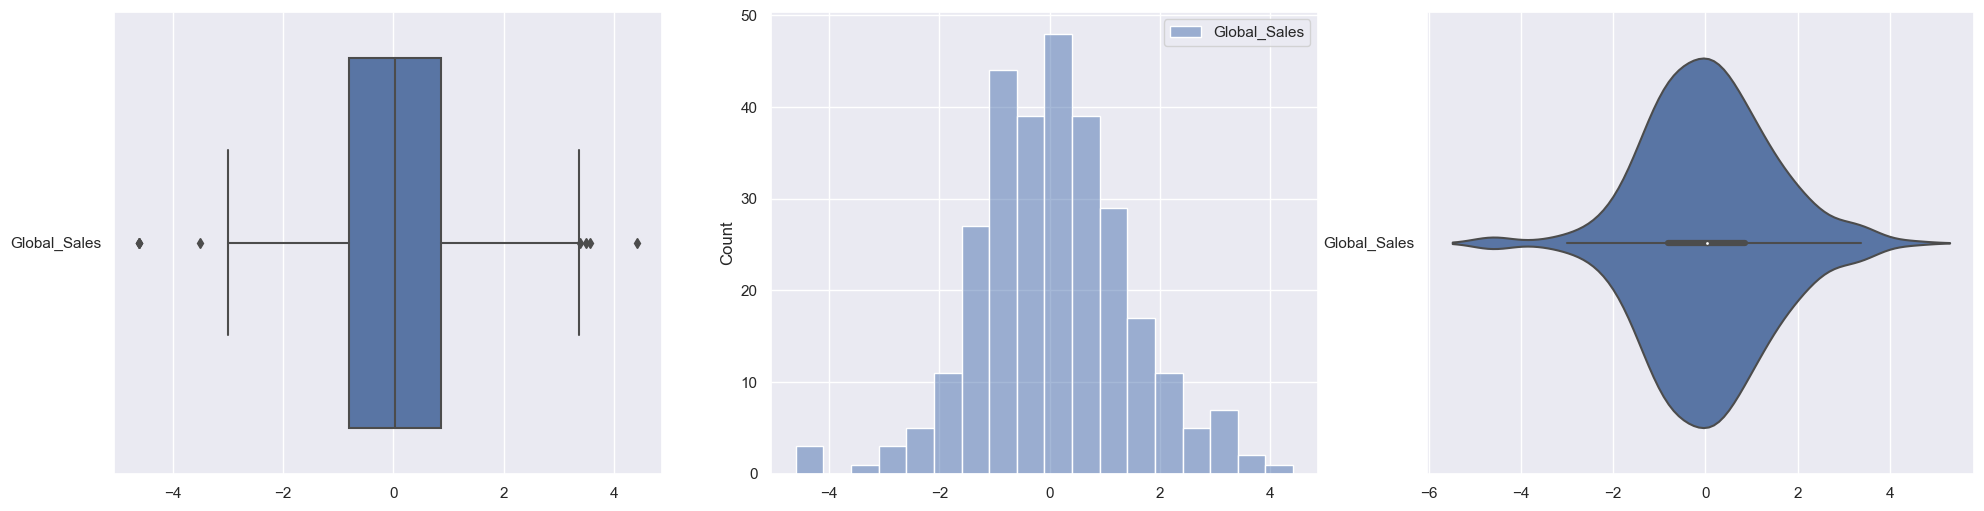

In [50]:
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = y, orient = "h", ax = axes[0])
sb.histplot(data = y, ax = axes[1])
sb.violinplot(data = y, orient = "h", ax = axes[2])

#### Train test split:

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=42)

In [52]:
linreg.fit(X_train,y_train)

LinearRegression()

In [53]:
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  [0.05452697]
Coefficients of Regression 	: a =  [[ 0.07649552 -0.26271168  0.13593074  0.52467674 -0.47439132]]



,Predictors,Coefficients
0,Genre_Action,0.076496
1,Genre_Adventure,-0.262712
2,Genre_Misc,0.135931
3,Genre_Platform,0.524677
4,Genre_Puzzle,-0.474391


In [54]:
# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

y_train_pred=linreg.predict(X_train)
y_test_pred=linreg.predict(X_test)

#transform it back
y_train=np.exp(y_train)
y_train_pred=np.exp(y_train_pred)
y_test=np.exp(y_test)
y_test_pred=np.exp(y_test_pred)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: -0.13903722300805477
Mean Squared Error (MSE) 	: 56.69076889041527

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.32517710275066847
Mean Squared Error (MSE) 	: 29.82552277884067



#### Genres all together do not help in predicting GlobalSales (Low explained variance, high MSE)

In [55]:
for var in X:
    GenreSales=japan_data[[var,'Global_Sales']]
    print(GenreSales.corr())

              Genre_Action  Global_Sales
Genre_Action      1.000000      0.104903
Global_Sales      0.104903      1.000000
                 Genre_Adventure  Global_Sales
Genre_Adventure         1.000000     -0.131843
Global_Sales           -0.131843      1.000000
              Genre_Misc  Global_Sales
Genre_Misc      1.000000      0.028202
Global_Sales    0.028202      1.000000
                Genre_Platform  Global_Sales
Genre_Platform        1.000000      0.071992
Global_Sales          0.071992      1.000000
              Genre_Puzzle  Global_Sales
Genre_Puzzle      1.000000     -0.074421
Global_Sales     -0.074421      1.000000


Possibly because correlation between globalSales and genres are all <0.15

#### How about using genres to predict user/critic scores?

In [56]:
for var in X:
    GenreSales=japan_data[[var,'Critic_Score']]
    print(GenreSales.corr())

              Genre_Action  Critic_Score
Genre_Action      1.000000      0.052541
Critic_Score      0.052541      1.000000
                 Genre_Adventure  Critic_Score
Genre_Adventure         1.000000     -0.093713
Critic_Score           -0.093713      1.000000
              Genre_Misc  Critic_Score
Genre_Misc      1.000000     -0.249828
Critic_Score   -0.249828      1.000000
                Genre_Platform  Critic_Score
Genre_Platform        1.000000      0.128355
Critic_Score          0.128355      1.000000
              Genre_Puzzle  Critic_Score
Genre_Puzzle      1.000000      0.143872
Critic_Score      0.143872      1.000000


In [57]:
for var in X:
    GenreSales=japan_data[[var,'User_Score']]
    print(GenreSales.corr())

              Genre_Action  User_Score
Genre_Action      1.000000    0.036311
User_Score        0.036311    1.000000
                 Genre_Adventure  User_Score
Genre_Adventure         1.000000    0.047106
User_Score              0.047106    1.000000
            Genre_Misc  User_Score
Genre_Misc    1.000000   -0.316932
User_Score   -0.316932    1.000000
                Genre_Platform  User_Score
Genre_Platform        1.000000    0.067743
User_Score            0.067743    1.000000
              Genre_Puzzle  User_Score
Genre_Puzzle      1.000000    0.124448
User_Score        0.124448    1.000000


#### GenreMisc has a -0.3/-0.25 correlation to User/Critic score respectively, worth checking out.

#### For UserScore:

,User_Score
0,8.0
2,8.3
3,8.0
6,8.5
7,6.6
...,...
13215,5.1
14295,7.0
16424,7.4
16514,8.3


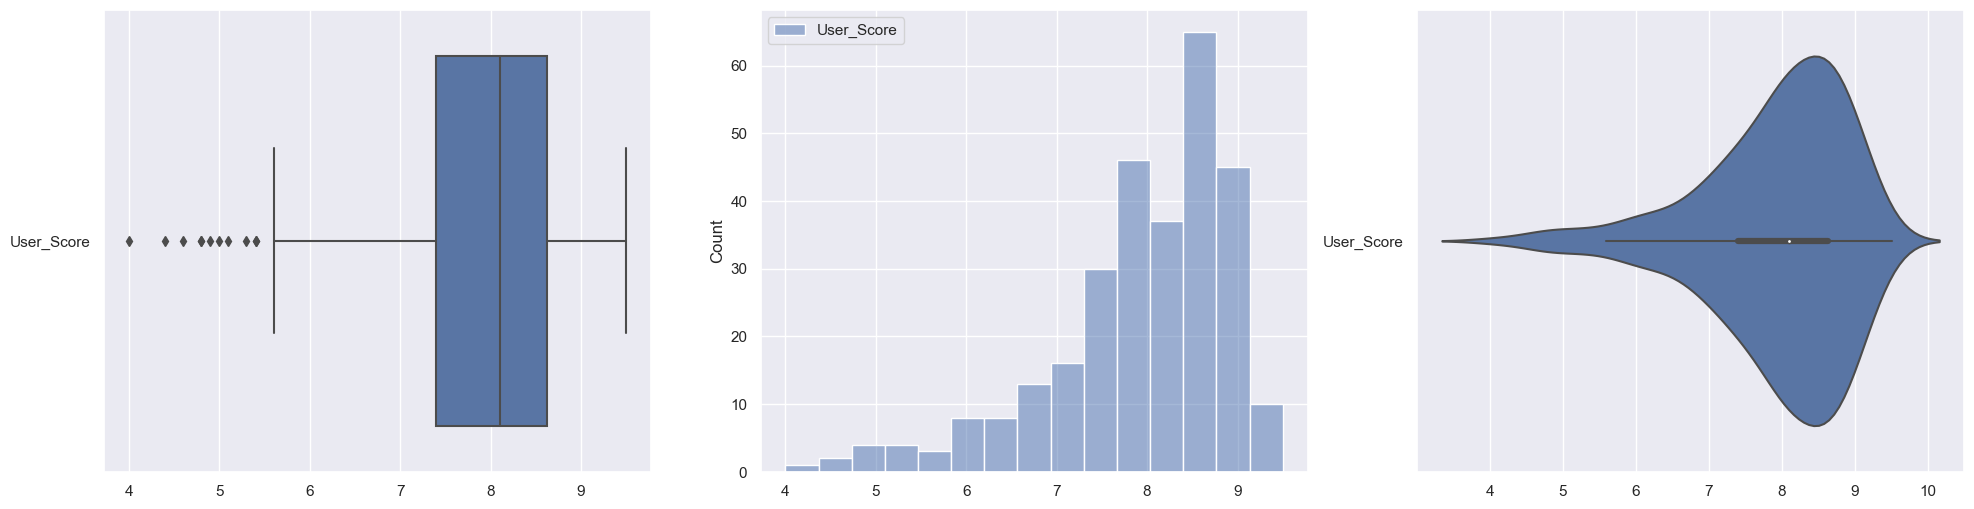

In [58]:
y = pd.DataFrame(japan_data["User_Score"])
X = pd.DataFrame(japan_data[['Genre_Action','Genre_Adventure','Genre_Misc','Genre_Platform','Genre_Puzzle']])
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = y, orient = "h", ax = axes[0])
sb.histplot(data = y, ax = axes[1])
sb.violinplot(data = y, orient = "h", ax = axes[2])
y

#### Normalise with cube

<AxesSubplot:>

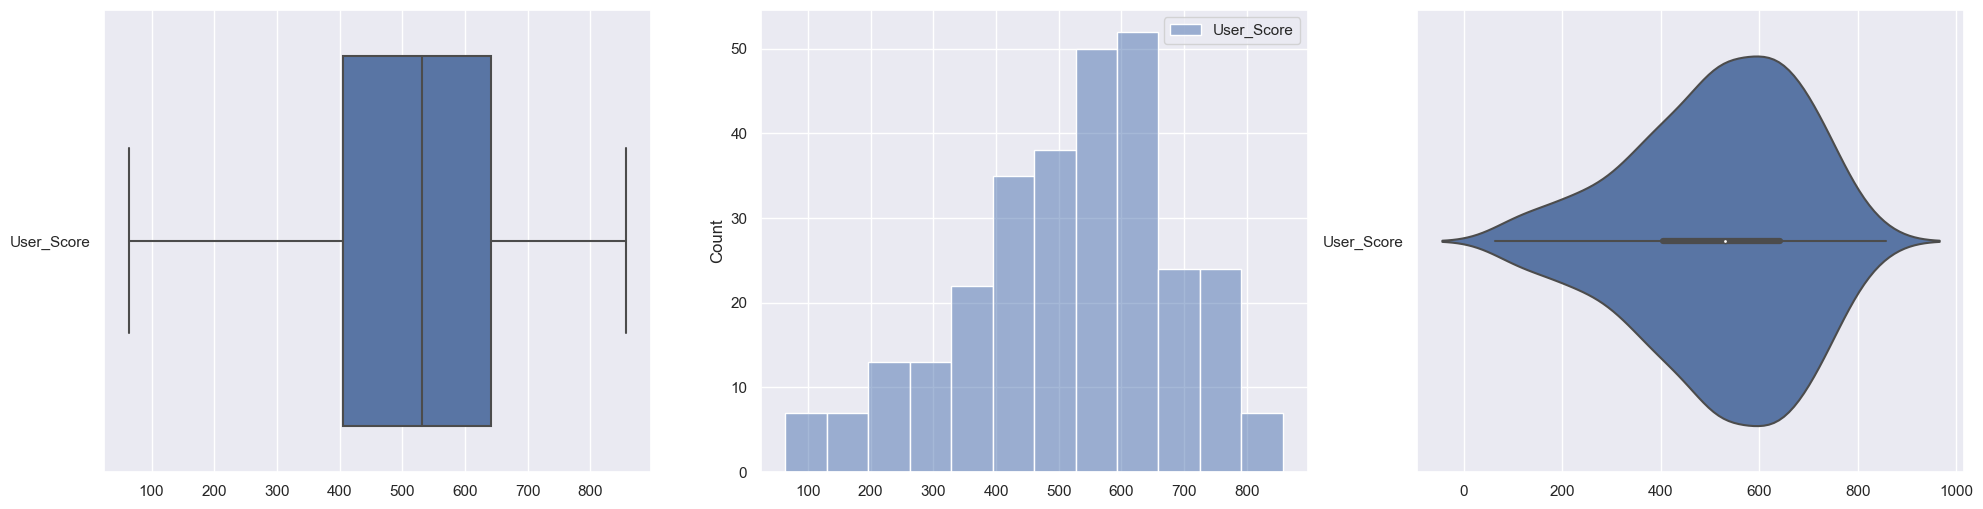

In [59]:
y=np.power(y,3)
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = y, orient = "h", ax = axes[0])
sb.histplot(data = y, ax = axes[1])
sb.violinplot(data = y, orient = "h", ax = axes[2])

In [60]:
y

,User_Score
0,512.000
2,571.787
3,512.000
6,614.125
7,287.496
...,...
13215,132.651
14295,343.000
16424,405.224
16514,571.787


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=42)

linreg.fit(X_train,y_train)

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])


Intercept of Regression 	: b =  [518.00952809]
Coefficients of Regression 	: a =  [[  0.65535426  12.19614538 -96.63987292  28.98926501  54.79910827]]



,Predictors,Coefficients
0,Genre_Action,0.655354
1,Genre_Adventure,12.196145
2,Genre_Misc,-96.639873
3,Genre_Platform,28.989265
4,Genre_Puzzle,54.799108


In [62]:
y_train

,User_Score
591,512.000
4051,456.533
230,438.976
62,373.248
16424,405.224
...,...
3108,592.704
611,512.000
1174,274.625
7706,493.039


In [63]:
y_train_pred=linreg.predict(X_train)
y_test_pred=linreg.predict(X_test)

#transform it back
y_train=np.cbrt(y_train)
y_train_pred=np.cbrt(y_train_pred)
y_test=np.cbrt(y_test)
y_test_pred=np.cbrt(y_test_pred)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()
y_train

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: -300698.02482171584
Mean Squared Error (MSE) 	: 0.8317410035270705

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -183629.50232039904
Mean Squared Error (MSE) 	: 1.275563578233708



,User_Score
591,8.0
4051,7.7
230,7.6
62,7.2
16424,7.4
...,...
3108,8.4
611,8.0
1174,6.5
7706,7.9


#### These are pretty bad too, with the R^2 values negative, suggesting that the model is performing worse than the naive model. Lets try just focussing on GenreMisc

<AxesSubplot:>

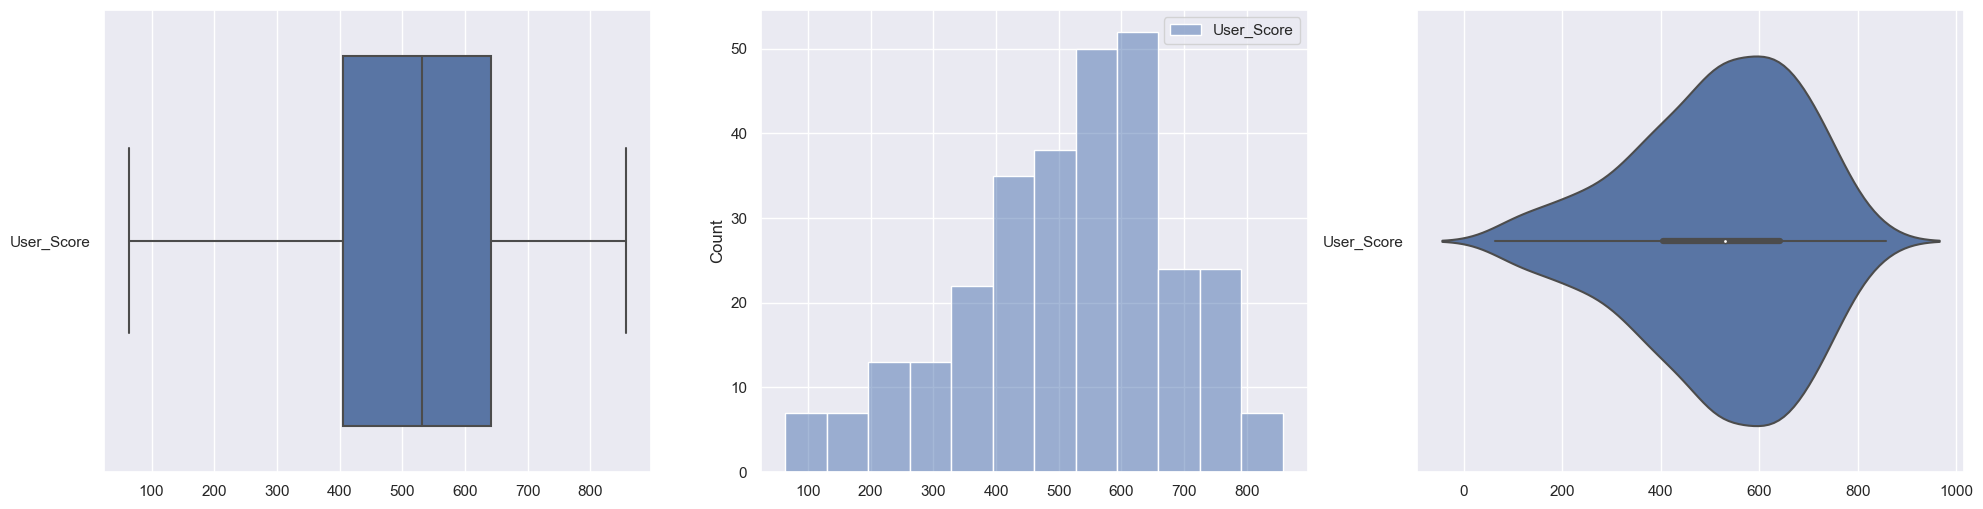

In [64]:
y = pd.DataFrame(japan_data["User_Score"])
X = pd.DataFrame(japan_data['Genre_Misc'])
#normalise
y=np.power(y,3)
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = y, orient = "h", ax = axes[0])
sb.histplot(data = y, ax = axes[1])
sb.violinplot(data = y, orient = "h", ax = axes[2])

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=42)

linreg.fit(X_train,y_train)

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])


Intercept of Regression 	: b =  [538.50439474]
Coefficients of Regression 	: a =  [[-117.13473956]]



,Predictors,Coefficients
0,Genre_Misc,-117.13474


In [66]:
y_train_pred=linreg.predict(X_train)
y_test_pred=linreg.predict(X_test)

#transform it back

y_train=np.cbrt(y_train)
y_train_pred=np.cbrt(y_train_pred)
y_test=np.cbrt(y_test)
y_test_pred=np.cbrt(y_test_pred)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: -300270.96084102464
Mean Squared Error (MSE) 	: 0.8429242374350219

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -186272.1588758693
Mean Squared Error (MSE) 	: 1.2686318873738298



#### Ok... so something is clearly wrong here, we have a corr of -0.3 but r^2 of -39314714??? possibly an issue with the transformation of the response variable.

#### No normalisation

Intercept of Regression 	: b =  [8.04368421]
Coefficients of Regression 	: a =  [[-0.69885662]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.06314292841515179
Mean Squared Error (MSE) 	: 0.832507512285674

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.1438048274263154
Mean Squared Error (MSE) 	: 1.2245020905322157


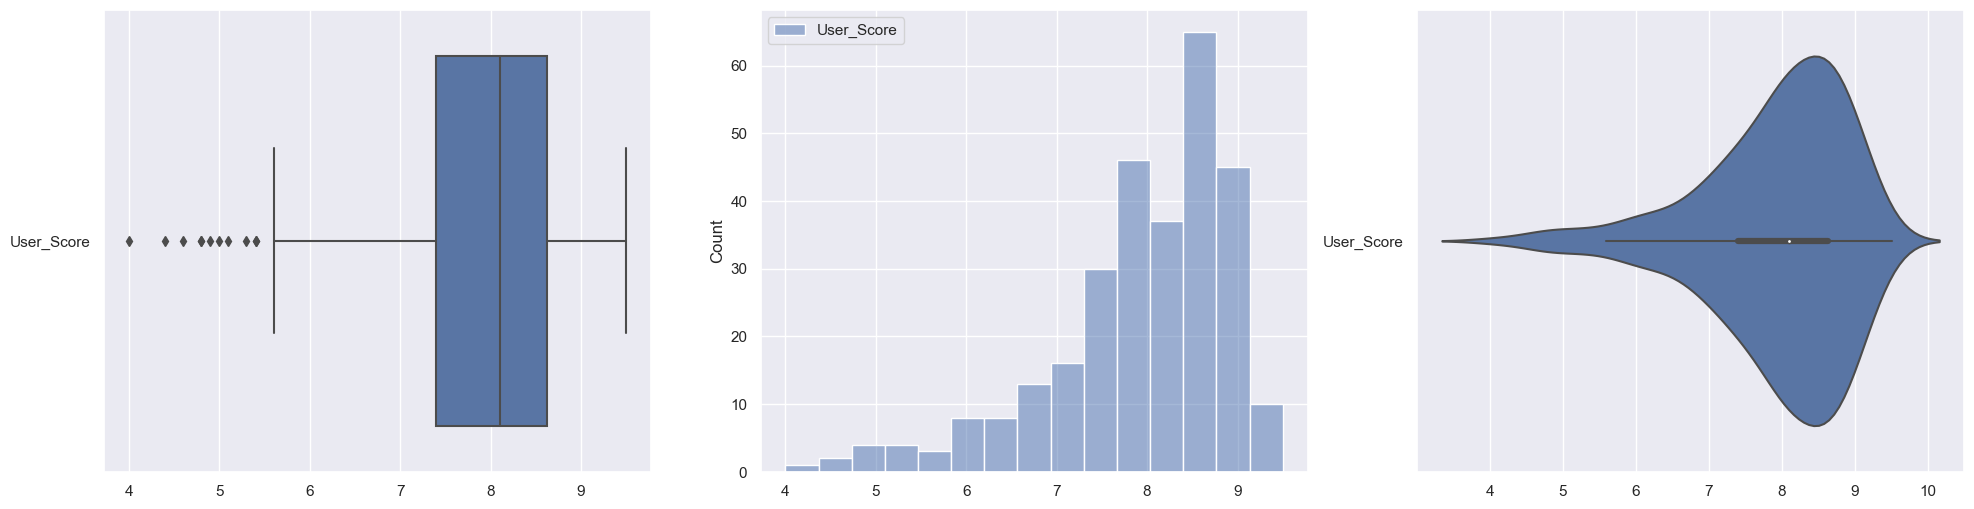

In [67]:
y = pd.DataFrame(japan_data["User_Score"])
X = pd.DataFrame(japan_data['Genre_Misc'])

f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = y, orient = "h", ax = axes[0])
sb.histplot(data = y, ax = axes[1])
sb.violinplot(data = y, orient = "h", ax = axes[2])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=42)

linreg.fit(X_train,y_train)

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

y_train_pred=linreg.predict(X_train)
y_test_pred=linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

#### Looks more like it, having y transformed to conform to normality seems to have backfired here. Possible reasons why are: overfitting caused by transforming variable with a power function or numerical instability. Since we are dealing with small numbers here, and we are attempting to cube then cuberoot the data (which the computer estimates), small (computational) estimation errors can cause big issues for the calculation of R^2 value or MSE due to the high sensitivity resultant from small magnitudes of data.

#### So back to removing outliers to make data more normal

<AxesSubplot:>

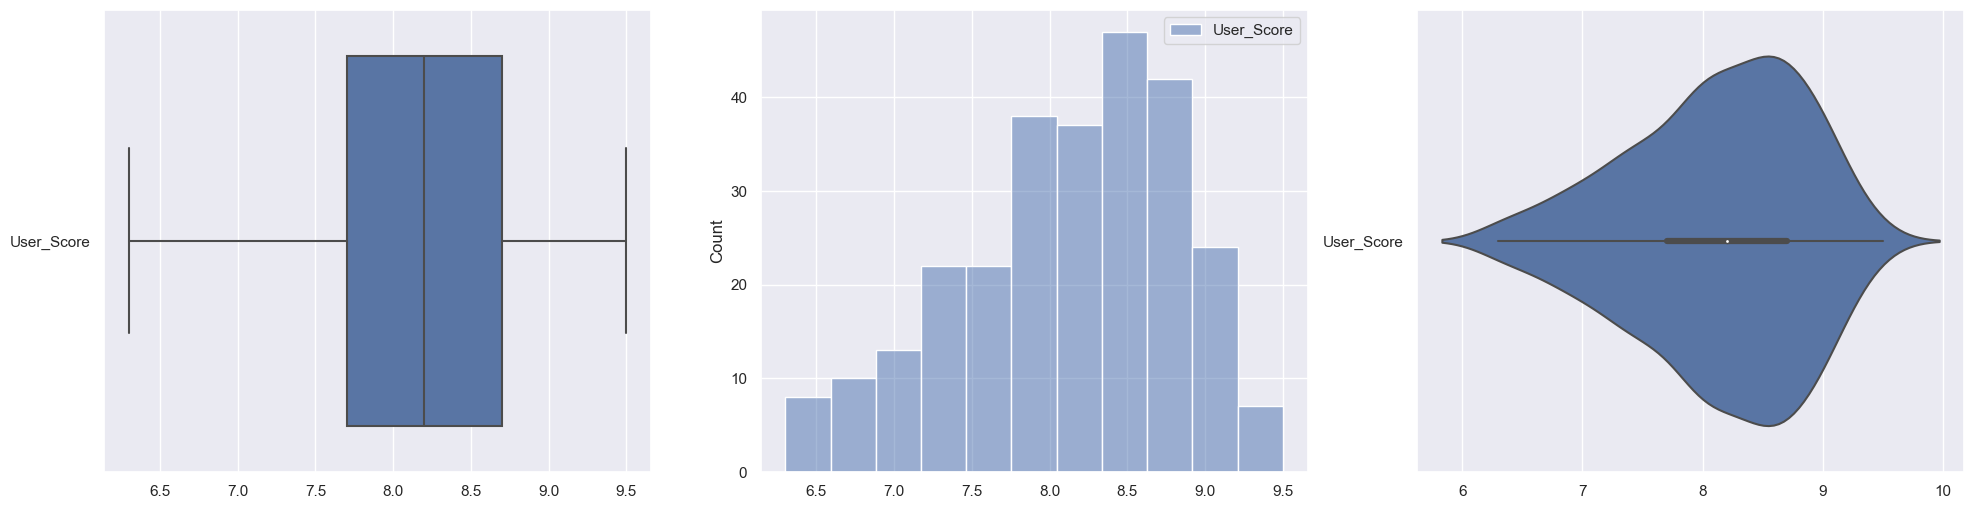

In [68]:
yX= pd.DataFrame(japan_data[["User_Score",'Genre_Misc']])
yX= removeOutliersIQR(yX,'User_Score')
y = pd.DataFrame(yX["User_Score"])
X = pd.DataFrame(yX['Genre_Misc'])


f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(data = y, orient = "h", ax = axes[0])
sb.histplot(data = y, ax = axes[1])
sb.violinplot(data = y, orient = "h", ax = axes[2])

In [69]:
def linear(y,X):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=42)

    linreg.fit(X_train,y_train)

    # Coefficients of the Linear Regression line
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    print()

    # Print the Coefficients against Predictors
    pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

    y_train_pred=linreg.predict(X_train)
    y_test_pred=linreg.predict(X_test)

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

In [70]:
linear(y,X)

Intercept of Regression 	: b =  [8.18932584]
Coefficients of Regression 	: a =  [[-0.55182584]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.060397793042255454
Mean Squared Error (MSE) 	: 0.49597014406496825

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.07383362880261413
Mean Squared Error (MSE) 	: 0.4504084866433791


In [71]:
def allGenres(response):
    for x in ['Genre_Action','Genre_Adventure','Genre_Misc','Genre_Platform','Genre_Puzzle']:
        print(x)
        print()
        yX= pd.DataFrame(japan_data[[response,x]])
        yX=removeOutliersIQR(yX,response)
        y = pd.DataFrame(yX[response])
        X = pd.DataFrame(yX[x])
        linear(y,X)
        print()

In [72]:
allGenres('User_Score')

Genre_Action

Intercept of Regression 	: b =  [8.15634921]
Coefficients of Regression 	: a =  [[-0.08661236]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.003335259884370778
Mean Squared Error (MSE) 	: 0.5260906701572413

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.004829410309669546
Mean Squared Error (MSE) 	: 0.48866349298260375

Genre_Adventure

Intercept of Regression 	: b =  [8.12012579]
Coefficients of Regression 	: a =  [[0.01708352]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 9.264156028609971e-05
Mean Squared Error (MSE) 	: 0.5278022901017614

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.0021085507911579038
Mean Squared Error (MSE) 	: 0.48528945927009237

Genre_Misc

Intercept of Regression 	: b =  [8.18932584]
Coefficients of Regression 	: a =  [[-0.55182584]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.060397793042255454
Mean Squared Error (MSE) 	:

#### here we see that only GenreMisc is somewhat significant, with >0.05 explained varience, and a negative coefficient, suggesting that if the game developers want higher UserScores they should shy away from the Misc category.

In [73]:
allGenres('Critic_Score')

Genre_Action

Intercept of Regression 	: b =  [75.48630137]
Coefficients of Regression 	: a =  [[3.42414639]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.025674659148989143
Mean Squared Error (MSE) 	: 95.93396849439856

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.0742971950351976
Mean Squared Error (MSE) 	: 105.15989365914852

Genre_Adventure

Intercept of Regression 	: b =  [77.46341463]
Coefficients of Regression 	: a =  [[-3.91239423]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.02753578915831867
Mean Squared Error (MSE) 	: 95.75071801307263

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.08382009197744589
Mean Squared Error (MSE) 	: 106.09206292702142

Genre_Misc

Intercept of Regression 	: b =  [77.63043478]
Coefficients of Regression 	: a =  [[-7.83733133]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.07337103019435343
Mean Squared Error (MSE) 	: 91.237

#### Same for Critic score

In [74]:
allGenres('Global_Sales')

Genre_Action

Intercept of Regression 	: b =  [1.17834586]
Coefficients of Regression 	: a =  [[-0.19966662]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.009072064563105275
Mean Squared Error (MSE) 	: 0.8872550733193301

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.0039990744612599105
Mean Squared Error (MSE) 	: 0.9128226527931188

Genre_Adventure

Intercept of Regression 	: b =  [1.16081481]
Coefficients of Regression 	: a =  [[-0.14355991]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.0045807649615715595
Mean Squared Error (MSE) 	: 0.89127648417551

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.013058541526807188
Mean Squared Error (MSE) 	: 0.8973140943963803

Genre_Misc

Intercept of Regression 	: b =  [1.0609375]
Coefficients of Regression 	: a =  [[0.43290865]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.025168281202391785
Mean Squared Error (MSE) 	: 0.87

#### For GlobalSales, we don't have any siginificant (past 0.05) findings on a Genre that might explain sufficient variance in the data, which is interesting because earlier, we managed to get a Classification accuracy of  >0.5 using Genres and GlobalSales to predict Ratings with a decision tree on the full dataset. (i.e. not just the japan/nintendo data) So we try with a decision tree, but later.

#### Reattempt the multivariable model

#### For GlobalSales:

In [75]:
yX=removeOutliersIQR(japan_data,"Global_Sales")
y = pd.DataFrame(yX["Global_Sales"])
X = pd.DataFrame(yX[['Genre_Action','Genre_Adventure','Genre_Misc','Genre_Platform','Genre_Puzzle']])



In [76]:
def multivariate(X,y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=42)

    linreg.fit(X_train,y_train)

    # Coefficients of the Linear Regression line
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    print()

    # Print the Coefficients against Predictors
    pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

    y_train_pred=linreg.predict(X_train)
    y_test_pred=linreg.predict(X_test)

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()

In [77]:
def fullMultivariate(response):
    yX=removeOutliersIQR(japan_data,response)
    y = pd.DataFrame(yX[response])
    X = pd.DataFrame(yX[['Genre_Action','Genre_Adventure','Genre_Misc','Genre_Platform','Genre_Puzzle']])
    multivariate(X,y)

In [78]:
fullMultivariate('Global_Sales')

Intercept of Regression 	: b =  [1.18008106]
Coefficients of Regression 	: a =  [[-0.20140181 -0.16282616  0.31376509  0.21241894 -0.16195606]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.04410062663995562
Mean Squared Error (MSE) 	: 0.855891269451934

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.04620632777735745
Mean Squared Error (MSE) 	: 0.8671765664353284



In [79]:
fullMultivariate('User_Score')

Intercept of Regression 	: b =  [8.11924217]
Coefficients of Regression 	: a =  [[-0.04950533  0.01796713 -0.48174217  0.22075783  0.29252254]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.09278733269005623
Mean Squared Error (MSE) 	: 0.4788732869840012

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.004255705243632946
Mean Squared Error (MSE) 	: 0.4842452661125729



In [80]:
fullMultivariate('Critic_Score')

Intercept of Regression 	: b =  [76.09317781]
Coefficients of Regression 	: a =  [[ 2.81726995 -2.5421574  -6.30007436  1.63096012  4.39400168]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.13267507124764466
Mean Squared Error (MSE) 	: 85.39849976257406

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.050452140773115106
Mean Squared Error (MSE) 	: 102.82576918960166



#### Here we see that using all genres to predict GlobalSales is somewhat successfully with an explained variance bordering 0.05 (actual: 0.046), while there are clear signs of overfitting in the case of User_Score and Critic_Score. This is the opposite of what we had when we analysed individual genres (Misc/~Misc predicts User_Score and Critic_score somewhat, but not so much GlobalSales). A possible reason for this is that the rest of the genres do not predict the Scores well, so adding them in results in overfitting of data, in contrast, the individual genres predict GlobalSales better on average, so although no specific Genre predicts GlobalSales well, we get a decent explained variance.

In [81]:
var=japan_data[['Global_Sales','User_Score','Critic_Score','Genre_Action','Genre_Adventure','Genre_Misc','Genre_Platform','Genre_Puzzle']]
#var=removeOutliersIQR(var,'Global_Sales')
var.corr()

,Global_Sales,User_Score,Critic_Score,Genre_Action,Genre_Adventure,Genre_Misc,Genre_Platform,Genre_Puzzle
Global_Sales,1.000000,0.053067,0.147592,0.104903,-0.131843,0.028202,0.071992,-0.074421
User_Score,0.053067,1.000000,0.671250,0.036311,0.047106,-0.316932,0.067743,0.124448
Critic_Score,0.147592,0.671250,1.000000,0.052541,-0.093713,-0.249828,0.128355,0.143872
Genre_Action,0.104903,0.036311,0.052541,1.000000,-0.372348,-0.270522,-0.278475,-0.320721
Genre_Adventure,-0.131843,0.047106,-0.093713,-0.372348,1.000000,-0.212173,-0.218410,-0.251544
Genre_Misc,0.028202,-0.316932,-0.249828,-0.270522,-0.212173,1.000000,-0.158682,-0.182755
Genre_Platform,0.071992,0.067743,0.128355,-0.278475,-0.218410,-0.158682,1.000000,-0.188127
Genre_Puzzle,-0.074421,0.124448,0.143872,-0.320721,-0.251544,-0.182755,-0.188127,1.000000


#### Lets try with a decision tree:

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [83]:
def tree(depth,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=42)
    tree=DecisionTreeClassifier(max_depth=depth)
    tree.fit(X_train,y_train)
    f=plt.figure(figsize=(16,12))
    plot_tree(tree,rounded=True,filled=True)
    y_train_pred=tree.predict(X_train)
    y_test_pred=tree.predict(X_test)
    f,axes=plt.subplots(1,2,figsize=(24,12))
    sb.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,annot_kws={'size':18},fmt=".0f",ax=axes[0])
    sb.heatmap(confusion_matrix(y_test,y_test_pred),annot=True,annot_kws={'size':18},fmt=".0f",ax=axes[1])
    
    print("tree")
    print()
    print("Train")
    TP=confusion_matrix(y_train,y_train_pred)[1,1]
    TN=confusion_matrix(y_train,y_train_pred)[0,0]
    FP=confusion_matrix(y_train,y_train_pred)[0,1]
    FN=confusion_matrix(y_train,y_train_pred)[1,0]
    train_CA=tree.score(X_train,y_train)
    print("Classification Accuracy: ", train_CA)
    TPR_train=TP/(TP+FN)
    FPR_train=FP/(FP+TN)
    print("True Positive Rate: ",TPR_train)
    print("False Positive Rate: ",FPR_train)

    print()
    print("Test")
    TP=confusion_matrix(y_test,y_test_pred)[1,1]
    TN=confusion_matrix(y_test,y_test_pred)[0,0]
    FP=confusion_matrix(y_test,y_test_pred)[0,1]
    FN=confusion_matrix(y_test,y_test_pred)[1,0]
    test_CA=tree.score(X_test,y_test)
    print("Classification Accuracy: ", test_CA)
    TPR_test=TP/(TP+FN)
    FPR_test=FP/(FP+TN)
    print("True Positive Rate: ",TPR_test)
    print("False Positive Rate: ",FPR_test)

In [84]:
GS=videoGamesSelectedCleaned[['Global_Sales']]
GS.describe()

,Global_Sales
count,6943.000000
mean,0.773419
std,1.949394
min,0.010000
25%,0.110000
50%,0.290000
75%,0.750000
max,82.530000


<AxesSubplot:>

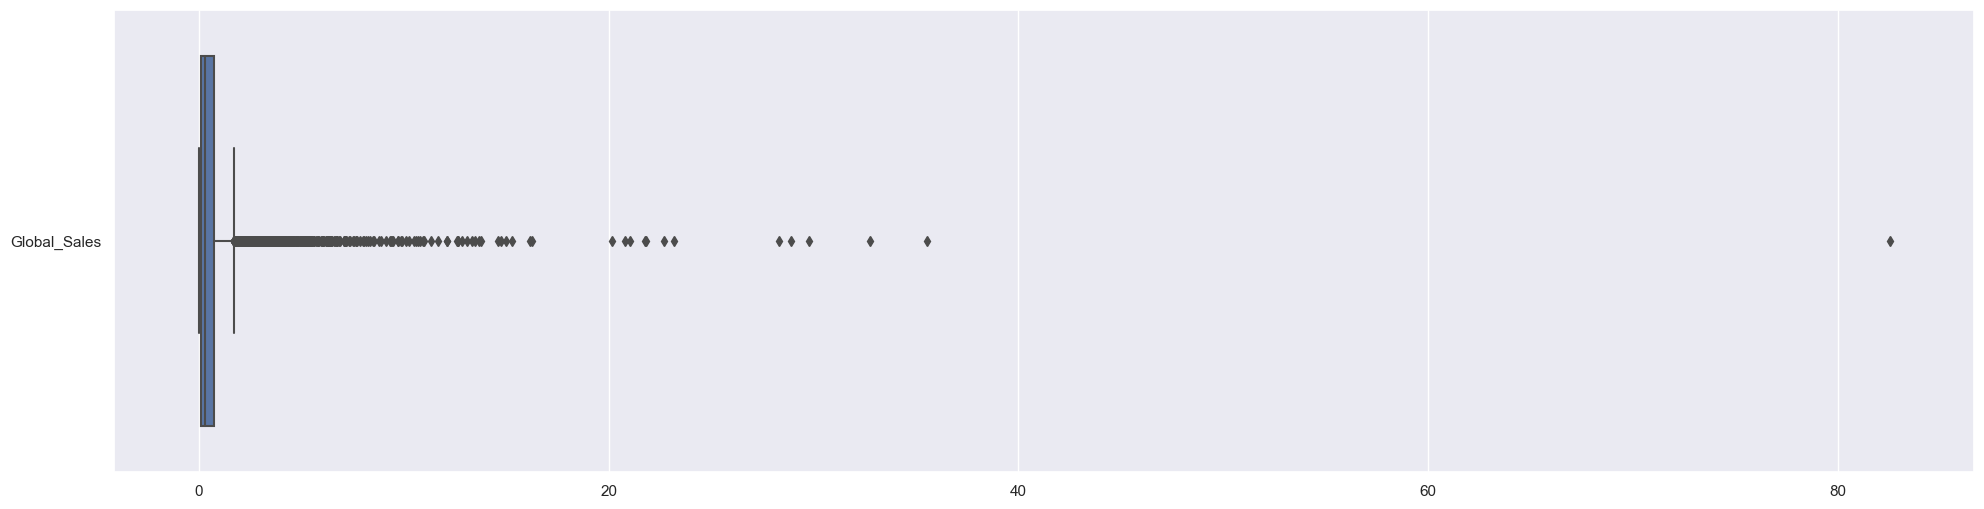

In [85]:
f, axes = plt.subplots(1, 1, figsize=(24, 6))
sb.boxplot(data = GS, orient = "h", ax = axes)

#### We categorise the global sales data with v. bad( <0.11  ), bad( 0.11<0.29  ), good( 0.29<0.75 ), and v. good ( 0.75< )

In [86]:
def toCat(df):
    bins=[0,np.percentile(df,25),np.percentile(df,50),np.percentile(df,75),np.percentile(df,100)]
    labels=['V. bad', 'Bad', 'Good', 'V. good']
    df = pd.cut(df, bins=bins, labels=labels)
    return df

tree

Train
Classification Accuracy:  0.3333333333333333
True Positive Rate:  0.6578947368421053
False Positive Rate:  0.5161290322580645

Test
Classification Accuracy:  0.30158730158730157
True Positive Rate:  0.4
False Positive Rate:  0.38461538461538464


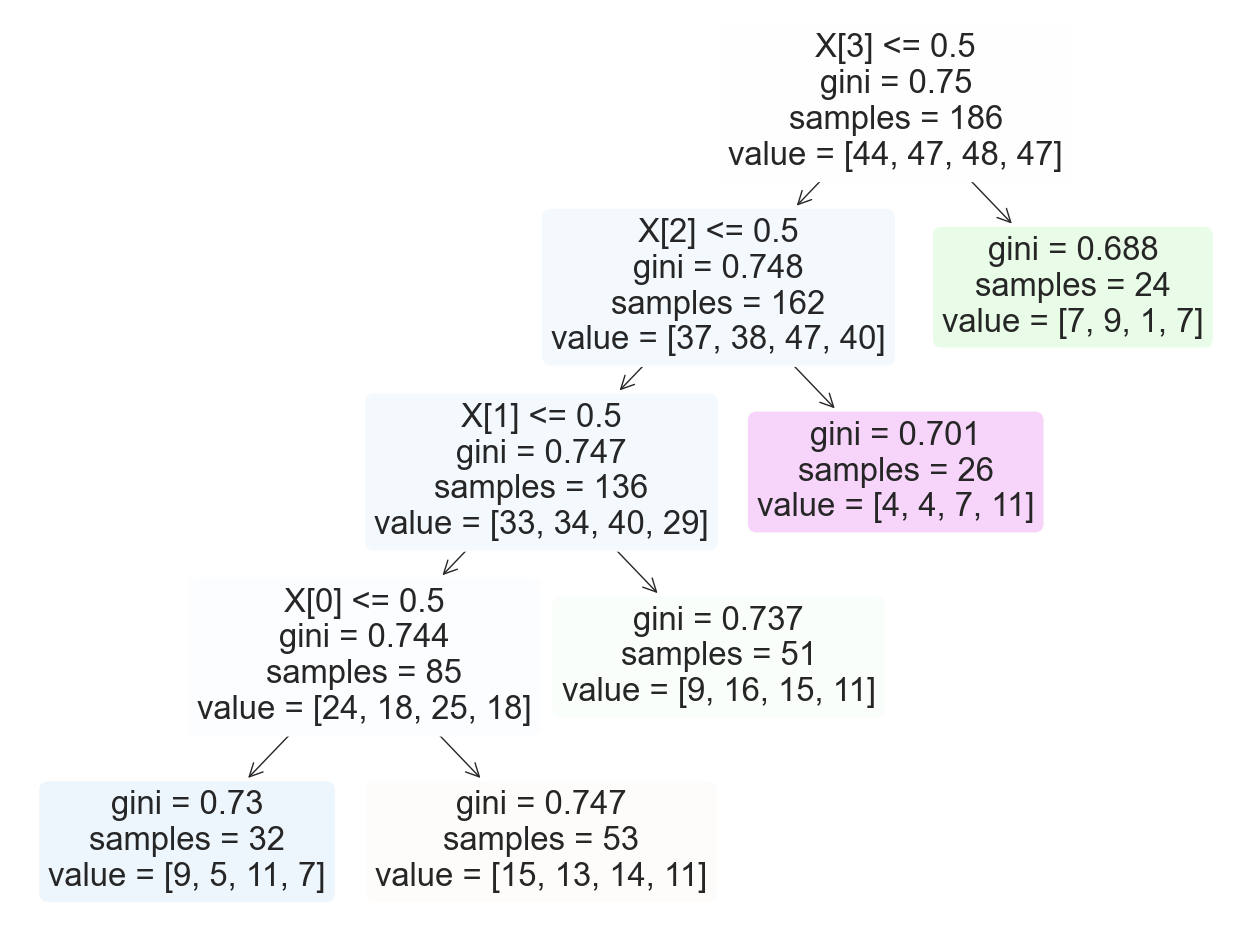

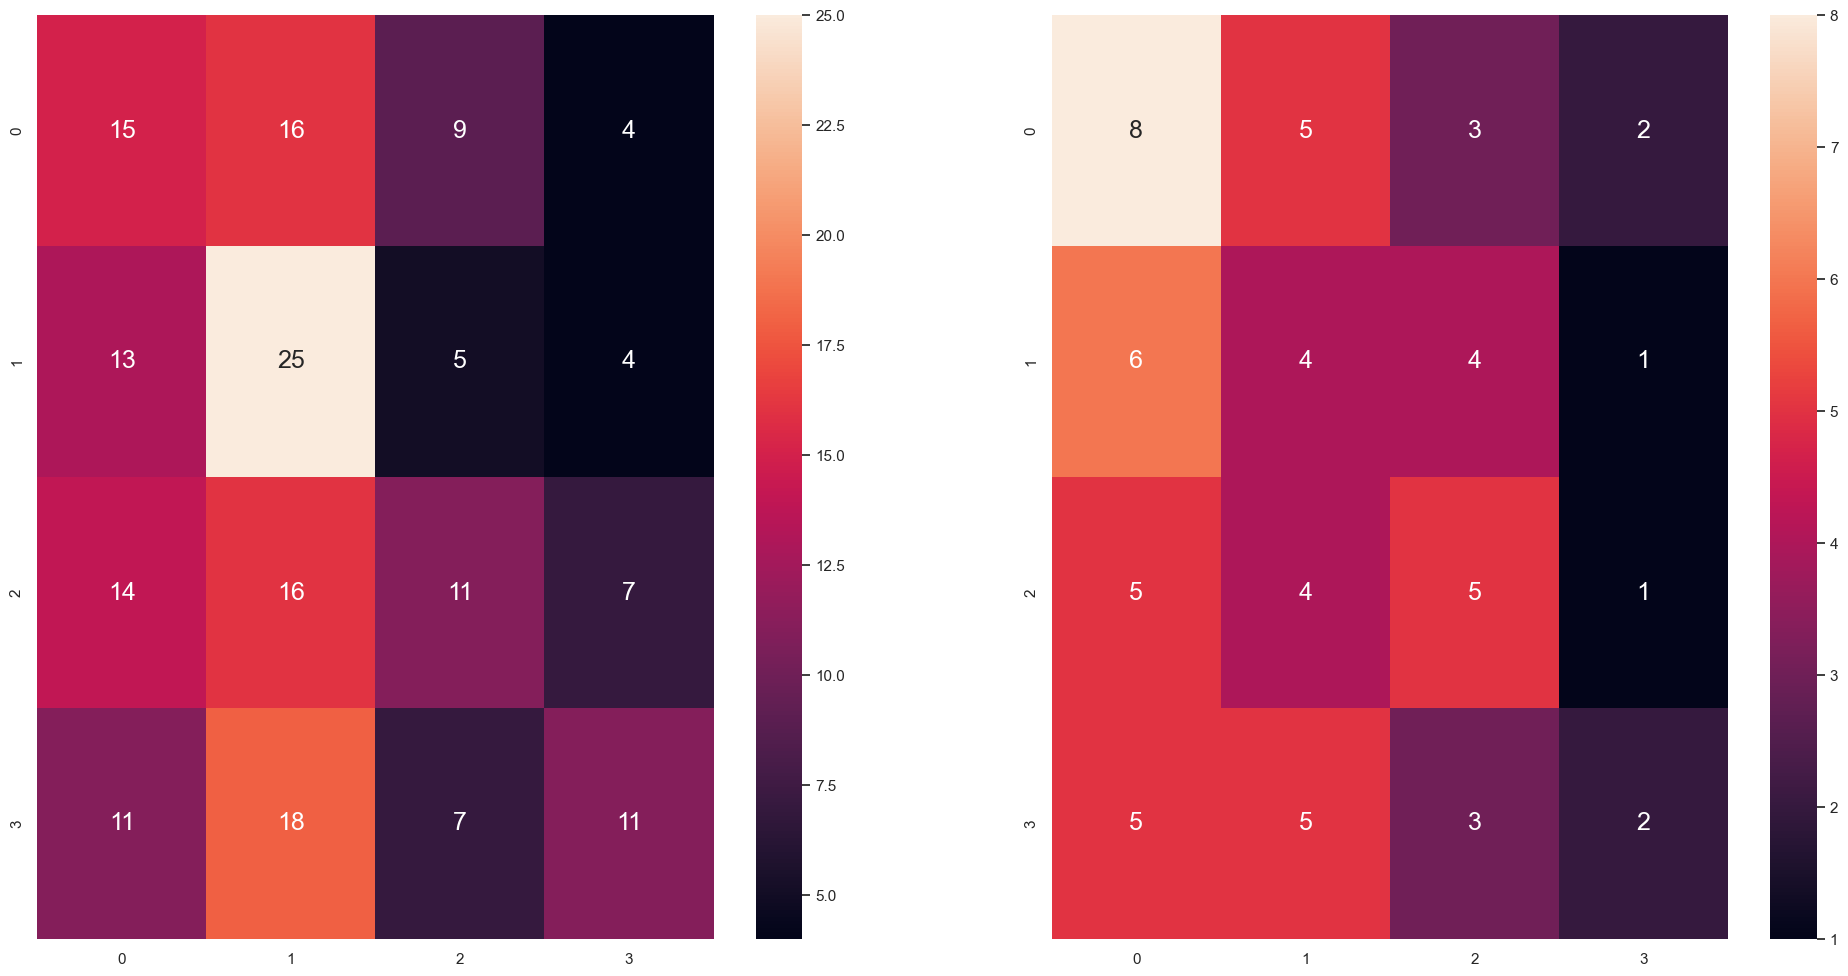

In [87]:
yX=removeOutliersIQR(japan_data,"Global_Sales")
catY=toCat(yX['Global_Sales'])
y = pd.DataFrame(catY)
X = pd.DataFrame(yX[['Genre_Action','Genre_Adventure','Genre_Misc','Genre_Platform','Genre_Puzzle']])

tree(5,X,y)